<a href="https://colab.research.google.com/github/Seongjin1225/AI-School-9_Mid_Project_Team2/blob/main/project_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 연도별 품목들의 구매 트렌드 분석
- 특정 요일에 많이 배송되는 품목 분석을 통한 요일별 마케팅 전략
- 계절별 데이터 분석을 통한 계절마다 선호되는 품목 확인 / 파이 그래프로 비율 시각화
- 명절 구매 트렌드 분석 / 블랙프라이데이 트렌드 분석 등 소비가 많은 기간의 분석
- 월별 또는 분기별 품목에 따른 구매 트렌드 분석
- 택배 도착 서울 자치구별 품목 분석을 통한 오프라인 마켓팅 품목 분석

In [ ]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 처리

## 서울-서울 데이터 처리

In [ ]:
all_files = glob.glob(r"csv/from_to_seoul*.csv")  # 파일 불러오기  ============================================================ 파일 경로
all_files.sort(reverse=True)  # 파일명 내림차순으로 정렬
print(all_files)

['csv/from_to_seoul_2309.csv', 'csv/from_to_seoul_2308.csv', 'csv/from_to_seoul_2307.csv', 'csv/from_to_seoul_2306.csv', 'csv/from_to_seoul_2305.csv', 'csv/from_to_seoul_2304.csv', 'csv/from_to_seoul_2303.csv', 'csv/from_to_seoul_2302.csv', 'csv/from_to_seoul_2301.csv', 'csv/from_to_seoul_2212.csv', 'csv/from_to_seoul_2211.csv', 'csv/from_to_seoul_2210.csv', 'csv/from_to_seoul_2209.csv', 'csv/from_to_seoul_2208.csv', 'csv/from_to_seoul_2207.csv', 'csv/from_to_seoul_2206.csv', 'csv/from_to_seoul_2205.csv', 'csv/from_to_seoul_2204.csv', 'csv/from_to_seoul_2203.csv', 'csv/from_to_seoul_2202.csv', 'csv/from_to_seoul_2201.csv', 'csv/from_to_seoul_2112.csv', 'csv/from_to_seoul_2111.csv', 'csv/from_to_seoul_2110.csv', 'csv/from_to_seoul_2109.csv', 'csv/from_to_seoul_2108.csv', 'csv/from_to_seoul_2107.csv', 'csv/from_to_seoul_2106.csv', 'csv/from_to_seoul_2105.csv', 'csv/from_to_seoul_2104.csv', 'csv/from_to_seoul_2103.csv', 'csv/from_to_seoul_2102.csv', 'csv/from_to_seoul_2101.csv']


In [ ]:
all_files_data = []
head_df = pd.read_csv(all_files[0], encoding="cp949")  # 첫 데이터(2309)를 데이터프레임으로 생성  ================================================ 파일 경로
col = head_df.columns  # 첫 데이터의 칼럼명을 변수에 저장

for file in all_files:
    df = pd.read_csv(file, encoding="cp949")  # 모든 데이터 데이터프레임으로 변환
    df.columns = col  # 변환된 데이터프레임 칼럼명을 col 칼럼명으로 지정
    all_files_data.append(df)  # 데이터프레임을 리스트에 추가

all_files_data[0].head()

,배송년월일,송하인_시명,송하인_시코드,송하인_구명,송하인_구코드,수하인_시명,수하인_시코드,수하인_구명,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,서울특별시,11,강남구,11680,서울특별시,11,송파구,11710,0,0,0,0,0,0,0,0,0,0,0
1,20230930,서울특별시,11,강남구,11680,서울특별시,11,강북구,11305,0,0,0,0,0,0,0,0,0,0,0
2,20230930,서울특별시,11,서초구,11650,서울특별시,11,강남구,11680,0,0,0,0,0,0,9,0,0,0,0
3,20230930,서울특별시,11,서초구,11650,서울특별시,11,서초구,11650,4,7,0,0,6,0,95,0,0,0,0
4,20230930,서울특별시,11,서초구,11650,서울특별시,11,동작구,11590,3,0,0,0,0,0,7,0,0,0,0


In [ ]:
# 데이터프레임 병합 / 첫 파일의 컬럼명으로 통일되어 병합됨
seoul_df = pd.concat(all_files_data, axis=0, ignore_index=True)

seoul_df

,배송년월일,송하인_시명,송하인_시코드,송하인_구명,송하인_구코드,수하인_시명,수하인_시코드,수하인_구명,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,서울특별시,11.0,강남구,11680.0,서울특별시,11.0,송파구,11710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,서울특별시,11.0,강남구,11680.0,서울특별시,11.0,강북구,11305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,강남구,11680.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
3,20230930,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,서초구,11650.0,4.0,7.0,0.0,0.0,6.0,0.0,95.0,0.0,0.0,0.0,0.0
4,20230930,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,동작구,11590.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575396,20210124,서울특별시,11.0,광진구,11215.0,서울특별시,11.0,은평구,11380.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575397,20210124,서울특별시,11.0,광진구,11215.0,서울특별시,11.0,강서구,11500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575398,20210124,서울특별시,11.0,광진구,11215.0,서울특별시,11.0,구로구,11530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575399,20210124,서울특별시,11.0,광진구,11215.0,서울특별시,11.0,동작구,11590.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 불필요 컬럼 정리
seoul_df.drop(columns=["송하인_시명", "송하인_시코드", "송하인_구명", "송하인_구코드", "수하인_시명", "수하인_시코드", "수하인_구명", "수하인_구코드"], inplace=True)
seoul_df

,배송년월일,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
3,20230930,4.0,7.0,0.0,0.0,6.0,0.0,95.0,0.0,0.0,0.0,0.0
4,20230930,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
575396,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575397,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575398,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575399,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 품목 컬럼명 정리
old_col = seoul_df.columns.str.split(" ")
new_col = []
for col in old_col:
    try:
        new_col.append(col[1])
    except:
        new_col.append(col[0])

print(new_col)


['배송년월일', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']


In [ ]:
seoul_df.columns = new_col
seoul_df["배송년월일"] = pd.to_datetime(seoul_df["배송년월일"].astype("str"))
seoul_df["총량"] = seoul_df.sum(axis="columns", numeric_only=True)
seoul_df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
0,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0
3,2023-09-30,4.0,7.0,0.0,0.0,6.0,0.0,95.0,0.0,0.0,0.0,0.0,112.0
4,2023-09-30,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575396,2021-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575397,2021-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575398,2021-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575399,2021-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575401 entries, 0 to 575400
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   배송년월일    575401 non-null  datetime64[ns]
 1   가구/인테리어  575401 non-null  float64       
 2   기타       575401 non-null  float64       
 3   도서/음반    575401 non-null  float64       
 4   디지털/가전   575401 non-null  float64       
 5   생활/건강    575401 non-null  float64       
 6   스포츠/레저   575401 non-null  float64       
 7   식품       575401 non-null  float64       
 8   출산/육아    575401 non-null  float64       
 9   패션의류     575401 non-null  float64       
 10  패션잡화     575401 non-null  float64       
 11  화장품/미용   575401 non-null  float64       
 12  총량       575401 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 57.1 MB


## 전국 - 서울 데이터 처리

In [ ]:
all_files = glob.glob(r"csv/to_seoul*.csv")  # 파일 불러오기  ============================================================ 파일 경로
all_files.sort(reverse=True)  # 파일명 내림차순으로 정렬
print(all_files)

['csv/to_seoul_2309.csv', 'csv/to_seoul_2308.csv', 'csv/to_seoul_2307.csv', 'csv/to_seoul_2306.csv', 'csv/to_seoul_2305.csv', 'csv/to_seoul_2304.csv', 'csv/to_seoul_2303.csv', 'csv/to_seoul_2302.csv', 'csv/to_seoul_2301.csv', 'csv/to_seoul_2212.csv', 'csv/to_seoul_2211.csv', 'csv/to_seoul_2210.csv', 'csv/to_seoul_2209.csv', 'csv/to_seoul_2208.csv', 'csv/to_seoul_2207.csv', 'csv/to_seoul_2206.csv', 'csv/to_seoul_2205.csv', 'csv/to_seoul_2204.csv', 'csv/to_seoul_2203.csv', 'csv/to_seoul_2202.csv', 'csv/to_seoul_2201.csv', 'csv/to_seoul_2112.csv', 'csv/to_seoul_2111.csv', 'csv/to_seoul_2110.csv', 'csv/to_seoul_2109.csv', 'csv/to_seoul_2108.csv', 'csv/to_seoul_2107.csv', 'csv/to_seoul_2106.csv', 'csv/to_seoul_2105.csv', 'csv/to_seoul_2104.csv', 'csv/to_seoul_2103.csv', 'csv/to_seoul_2102.csv', 'csv/to_seoul_2101.csv']


In [ ]:
all_files_data = []
head_df = pd.read_csv(all_files[0], encoding="cp949")  # 첫 데이터(2309)를 데이터프레임으로 생성  ================================================ 파일 경로
col = head_df.columns  # 첫 데이터의 칼럼명을 변수에 저장

for file in all_files:
    df = pd.read_csv(file, encoding="cp949")  # 모든 데이터 데이터프레임으로 변환
    df.columns = col  # 변환된 데이터프레임 칼럼명을 col 칼럼명으로 지정
    all_files_data.append(df)  # 데이터프레임을 리스트에 추가

all_files_data[0].head()

,배송년월일,송하인_시명,송하인_시코드,수하인_시명,수하인_시코드,수하인_구명,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,경상남도,48,서울특별시,11,강동구,11740,0,0,0,0,4,0,0,0,0,0,0
1,20230930,경상남도,48,서울특별시,11,송파구,11710,0,0,0,0,3,0,0,0,0,0,0
2,20230930,경상남도,48,서울특별시,11,강남구,11680,0,0,0,0,0,0,0,0,0,0,0
3,20230930,경상남도,48,서울특별시,11,서초구,11650,0,0,0,0,5,0,0,0,0,0,0
4,20230930,경상남도,48,서울특별시,11,관악구,11620,0,0,0,0,4,0,0,0,0,0,0


In [ ]:
# 데이터프레임 병합 / 첫 파일의 컬럼명으로 통일되어 병합됨
to_seoul_df = pd.concat(all_files_data, axis=0, ignore_index=True)

to_seoul_df

,배송년월일,송하인_시명,송하인_시코드,수하인_시명,수하인_시코드,수하인_구명,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,경상남도,48.0,서울특별시,11.0,강동구,11740.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,경상남도,48.0,서울특별시,11.0,송파구,11710.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,경상남도,48.0,서울특별시,11.0,강남구,11680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230930,경상남도,48.0,서울특별시,11.0,서초구,11650.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230930,경상남도,48.0,서울특별시,11.0,관악구,11620.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416058,20210127,충청북도,43.0,서울특별시,11.0,관악구,11620.0,10.0,129.0,19.0,34.0,178.0,13.0,1228.0,39.0,120.0,18.0,76.0
416059,20210127,충청북도,43.0,서울특별시,11.0,서초구,11650.0,17.0,153.0,18.0,21.0,230.0,25.0,1337.0,53.0,101.0,55.0,57.0
416060,20210127,충청북도,43.0,서울특별시,11.0,강남구,11680.0,14.0,252.0,36.0,55.0,362.0,34.0,1875.0,58.0,169.0,141.0,89.0
416061,20210127,충청북도,43.0,서울특별시,11.0,송파구,11710.0,19.0,255.0,16.0,33.0,275.0,17.0,1741.0,85.0,174.0,34.0,90.0


In [ ]:
to_seoul_df.drop(columns=["송하인_시명", "송하인_시코드", "수하인_시명", "수하인_시코드", "수하인_구명", "수하인_구코드"], inplace=True)
to_seoul_df

,배송년월일,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230930,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230930,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
416058,20210127,10.0,129.0,19.0,34.0,178.0,13.0,1228.0,39.0,120.0,18.0,76.0
416059,20210127,17.0,153.0,18.0,21.0,230.0,25.0,1337.0,53.0,101.0,55.0,57.0
416060,20210127,14.0,252.0,36.0,55.0,362.0,34.0,1875.0,58.0,169.0,141.0,89.0
416061,20210127,19.0,255.0,16.0,33.0,275.0,17.0,1741.0,85.0,174.0,34.0,90.0


In [ ]:
# 품목 컬럼명 정리
old_col = to_seoul_df.columns.str.split(" ")
new_col = []
for col in old_col:
    try:
        new_col.append(col[1])
    except:
        new_col.append(col[0])

print(new_col)

['배송년월일', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']


In [ ]:
to_seoul_df.columns = new_col
to_seoul_df["배송년월일"] = pd.to_datetime(to_seoul_df["배송년월일"].astype("str"))
to_seoul_df["총량"] = to_seoul_df.sum(axis="columns", numeric_only=True)
to_seoul_df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
0,2023-09-30,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2023-09-30,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-09-30,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,2023-09-30,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416058,2021-01-27,10.0,129.0,19.0,34.0,178.0,13.0,1228.0,39.0,120.0,18.0,76.0,1864.0
416059,2021-01-27,17.0,153.0,18.0,21.0,230.0,25.0,1337.0,53.0,101.0,55.0,57.0,2067.0
416060,2021-01-27,14.0,252.0,36.0,55.0,362.0,34.0,1875.0,58.0,169.0,141.0,89.0,3085.0
416061,2021-01-27,19.0,255.0,16.0,33.0,275.0,17.0,1741.0,85.0,174.0,34.0,90.0,2739.0


In [ ]:
to_seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416063 entries, 0 to 416062
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   배송년월일    416063 non-null  datetime64[ns]
 1   가구/인테리어  416063 non-null  float64       
 2   기타       416063 non-null  float64       
 3   도서/음반    416063 non-null  float64       
 4   디지털/가전   416063 non-null  float64       
 5   생활/건강    416063 non-null  float64       
 6   스포츠/레저   416063 non-null  float64       
 7   식품       416063 non-null  float64       
 8   출산/육아    416063 non-null  float64       
 9   패션의류     416063 non-null  float64       
 10  패션잡화     416063 non-null  float64       
 11  화장품/미용   416063 non-null  float64       
 12  총량       416063 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 41.3 MB


## 서울 - 전국 데이터 처리

In [ ]:
all_files = glob.glob(r"csv/from_seoul*.csv")  # 파일 불러오기  ============================================================ 파일 경로
all_files.sort(reverse=True)  # 파일명 내림차순으로 정렬
print(all_files)

['csv/from_seoul_2309.csv', 'csv/from_seoul_2308.csv', 'csv/from_seoul_2307.csv', 'csv/from_seoul_2306.csv', 'csv/from_seoul_2305.csv', 'csv/from_seoul_2304.csv', 'csv/from_seoul_2303.csv', 'csv/from_seoul_2302.csv', 'csv/from_seoul_2301.csv', 'csv/from_seoul_2212.csv', 'csv/from_seoul_2211.csv', 'csv/from_seoul_2210.csv', 'csv/from_seoul_2209.csv', 'csv/from_seoul_2208.csv', 'csv/from_seoul_2207.csv', 'csv/from_seoul_2206.csv', 'csv/from_seoul_2205.csv', 'csv/from_seoul_2204.csv', 'csv/from_seoul_2203.csv', 'csv/from_seoul_2202.csv', 'csv/from_seoul_2201.csv', 'csv/from_seoul_2112.csv', 'csv/from_seoul_2111.csv', 'csv/from_seoul_2110.csv', 'csv/from_seoul_2109.csv', 'csv/from_seoul_2108.csv', 'csv/from_seoul_2107.csv', 'csv/from_seoul_2106.csv', 'csv/from_seoul_2105.csv', 'csv/from_seoul_2104.csv', 'csv/from_seoul_2103.csv', 'csv/from_seoul_2102.csv', 'csv/from_seoul_2101.csv']


In [ ]:
all_files_data = []
head_df = pd.read_csv(all_files[0], encoding="cp949")  # 첫 데이터(2309)를 데이터프레임으로 생성  ================================================ 파일 경로
col = head_df.columns  # 첫 데이터의 칼럼명을 변수에 저장

for file in all_files:
    df = pd.read_csv(file, encoding="cp949")  # 모든 데이터 데이터프레임으로 변환
    df.columns = col  # 변환된 데이터프레임 칼럼명을 col 칼럼명으로 지정
    all_files_data.append(df)  # 데이터프레임을 리스트에 추가

all_files_data[0].head()

,배송년월일,송하인_시명,송하인_시코드,송하인_구명,송하인_구코드,수하인_시명,수하인_시코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,서울특별시,11,강동구,11740,경기도,41,0,0,0,0,0,0,0,0,0,0,0
1,20230930,서울특별시,11,강남구,11680,경상남도,48,0,0,0,0,0,0,0,0,0,0,0
2,20230930,서울특별시,11,강남구,11680,경기도,41,0,0,0,0,0,0,0,0,0,0,0
3,20230930,서울특별시,11,강남구,11680,서울특별시,11,0,0,0,0,0,0,0,0,0,0,0
4,20230930,서울특별시,11,서초구,11650,경기도,41,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 데이터프레임 병합 / 첫 파일의 컬럼명으로 통일되어 병합됨
from_seoul_df = pd.concat(all_files_data, axis=0, ignore_index=True)

from_seoul_df

,배송년월일,송하인_시명,송하인_시코드,송하인_구명,송하인_구코드,수하인_시명,수하인_시코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,서울특별시,11.0,강동구,11740.0,경기도,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,서울특별시,11.0,강남구,11680.0,경상남도,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,서울특별시,11.0,강남구,11680.0,경기도,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230930,서울특별시,11.0,강남구,11680.0,서울특별시,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230930,서울특별시,11.0,서초구,11650.0,경기도,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400337,20210131,서울특별시,11.0,종로구,11110.0,전라북도,45.0,0.0,0.0,0.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0
400338,20210131,서울특별시,11.0,종로구,11110.0,전라남도,46.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0
400339,20210131,서울특별시,11.0,종로구,11110.0,경상북도,47.0,0.0,0.0,0.0,0.0,4.0,0.0,25.0,0.0,0.0,0.0,0.0
400340,20210131,서울특별시,11.0,종로구,11110.0,경상남도,48.0,0.0,0.0,0.0,0.0,3.0,0.0,51.0,0.0,0.0,0.0,0.0


In [ ]:
from_seoul_df.drop(columns=["송하인_시명", "송하인_시코드", "송하인_구명", "송하인_구코드", "수하인_시명", "수하인_시코드"], inplace=True)
from_seoul_df

,배송년월일,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400337,20210131,0.0,0.0,0.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0
400338,20210131,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0
400339,20210131,0.0,0.0,0.0,0.0,4.0,0.0,25.0,0.0,0.0,0.0,0.0
400340,20210131,0.0,0.0,0.0,0.0,3.0,0.0,51.0,0.0,0.0,0.0,0.0


In [ ]:
# 품목 컬럼명 정리
old_col = from_seoul_df.columns.str.split(" ")
new_col = []
for col in old_col:
    try:
        new_col.append(col[1])
    except:
        new_col.append(col[0])

print(new_col)

['배송년월일', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']


In [ ]:
from_seoul_df.columns = new_col
from_seoul_df["배송년월일"] = pd.to_datetime(from_seoul_df["배송년월일"].astype("str"))
from_seoul_df["총량"] = from_seoul_df.sum(axis="columns", numeric_only=True)
from_seoul_df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
0,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400337,2021-01-31,0.0,0.0,0.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0,20.0
400338,2021-01-31,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,23.0
400339,2021-01-31,0.0,0.0,0.0,0.0,4.0,0.0,25.0,0.0,0.0,0.0,0.0,29.0
400340,2021-01-31,0.0,0.0,0.0,0.0,3.0,0.0,51.0,0.0,0.0,0.0,0.0,54.0


In [ ]:
to_seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416063 entries, 0 to 416062
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   배송년월일    416063 non-null  datetime64[ns]
 1   가구/인테리어  416063 non-null  float64       
 2   기타       416063 non-null  float64       
 3   도서/음반    416063 non-null  float64       
 4   디지털/가전   416063 non-null  float64       
 5   생활/건강    416063 non-null  float64       
 6   스포츠/레저   416063 non-null  float64       
 7   식품       416063 non-null  float64       
 8   출산/육아    416063 non-null  float64       
 9   패션의류     416063 non-null  float64       
 10  패션잡화     416063 non-null  float64       
 11  화장품/미용   416063 non-null  float64       
 12  총량       416063 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 41.3 MB


## 데이터 병합

In [ ]:
df = pd.concat([seoul_df, to_seoul_df, from_seoul_df], axis=0, ignore_index=True)
df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
0,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0
3,2023-09-30,4.0,7.0,0.0,0.0,6.0,0.0,95.0,0.0,0.0,0.0,0.0,112.0
4,2023-09-30,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391801,2021-01-31,0.0,0.0,0.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0,20.0
1391802,2021-01-31,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,23.0
1391803,2021-01-31,0.0,0.0,0.0,0.0,4.0,0.0,25.0,0.0,0.0,0.0,0.0,29.0
1391804,2021-01-31,0.0,0.0,0.0,0.0,3.0,0.0,51.0,0.0,0.0,0.0,0.0,54.0


## 기초정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391806 entries, 0 to 1391805
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   배송년월일    1391806 non-null  datetime64[ns]
 1   가구/인테리어  1391806 non-null  float64       
 2   기타       1391806 non-null  float64       
 3   도서/음반    1391806 non-null  float64       
 4   디지털/가전   1391806 non-null  float64       
 5   생활/건강    1391806 non-null  float64       
 6   스포츠/레저   1391806 non-null  float64       
 7   식품       1391806 non-null  float64       
 8   출산/육아    1391806 non-null  float64       
 9   패션의류     1391806 non-null  float64       
 10  패션잡화     1391806 non-null  float64       
 11  화장품/미용   1391806 non-null  float64       
 12  총량       1391806 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 138.0 MB


## 결측치 확인

In [ ]:
df.isna().value_counts()

배송년월일  가구/인테리어  기타     도서/음반  디지털/가전  생활/건강  스포츠/레저  식품     출산/육아  패션의류   패션잡화   화장품/미용  총량   
False  False    False  False  False   False  False   False  False  False  False  False   False    1391806
Name: count, dtype: int64

## 중복값 확인

In [ ]:
df[df.duplicated()]
# 전체 데이터에서 일자 관련 데이터만 남겨서 중복되는 값이 발생

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
1,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391796,2021-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391800,2021-01-31,0.0,0.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,28.0
1391802,2021-01-31,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,23.0
1391803,2021-01-31,0.0,0.0,0.0,0.0,4.0,0.0,25.0,0.0,0.0,0.0,0.0,29.0


In [ ]:
# 일자별 통합
df = df.groupby("배송년월일").sum().reset_index()
df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
0,2021-01-01,458.0,6489.0,46878.0,5552.0,7243.0,1993.0,20759.0,4951.0,4557.0,3226.0,5950.0,108056.0
1,2021-01-02,8839.0,90981.0,74651.0,31576.0,70466.0,10171.0,111267.0,29229.0,122235.0,48099.0,39804.0,637318.0
2,2021-01-03,10361.0,11792.0,58227.0,15360.0,50975.0,2521.0,180003.0,7594.0,31245.0,10224.0,40257.0,418559.0
3,2021-01-04,191370.0,684172.0,262651.0,546555.0,994424.0,117510.0,1064841.0,126567.0,788938.0,363482.0,487006.0,5627516.0
4,2021-01-05,107411.0,439273.0,196770.0,321254.0,553526.0,57375.0,657007.0,86460.0,521622.0,237004.0,248600.0,3426302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0,1416490.0
999,2023-09-27,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0,618901.0
1000,2023-09-28,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0,39668.0
1001,2023-09-29,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0,594.0


In [ ]:
df.duplicated().value_counts()
# 일자별로 통합 후 이상 없음

False    1003
Name: count, dtype: int64

## 이상치 확인

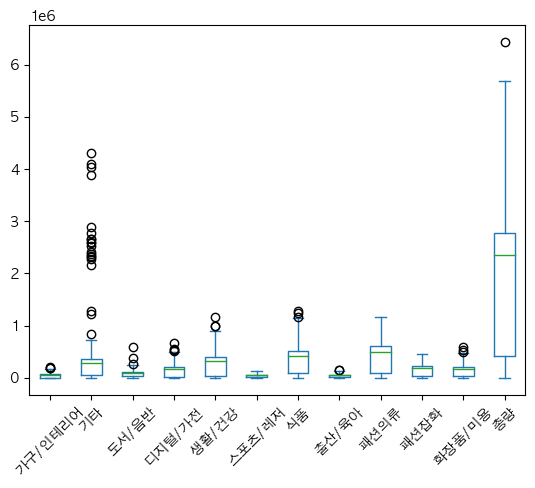

In [ ]:
plt.rc('font',family = 'AppleGothic') #========================================================================================= 폰트
df.groupby("배송년월일").sum().plot.box()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 유독 높은 이상치가 많은 기타품목 확인
df[df["기타"] > 2000000]

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
367,2022-01-03,0.0,4032978.0,56.0,3.0,38.0,3.0,7.0,11.0,18.0,109.0,0.0,4033223.0
368,2022-01-04,3.0,2666064.0,551.0,282.0,1373.0,0.0,273.0,145.0,837.0,160.0,674.0,2670362.0
370,2022-01-06,0.0,2325194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2325194.0
371,2022-01-07,0.0,2161387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2161387.0
374,2022-01-10,0.0,3878642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3878642.0
375,2022-01-11,0.0,2585406.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2585406.0
376,2022-01-12,0.0,2406811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2406811.0
377,2022-01-13,0.0,2370842.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2370842.0
378,2022-01-14,0.0,2279562.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2279562.0
381,2022-01-17,0.0,4102153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4102153.0


In [ ]:
df["year"] = df["배송년월일"].dt.year
df["month"] = df["배송년월일"].dt.month

In [ ]:
df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month
0,2021-01-01,458.0,6489.0,46878.0,5552.0,7243.0,1993.0,20759.0,4951.0,4557.0,3226.0,5950.0,108056.0,2021,1
1,2021-01-02,8839.0,90981.0,74651.0,31576.0,70466.0,10171.0,111267.0,29229.0,122235.0,48099.0,39804.0,637318.0,2021,1
2,2021-01-03,10361.0,11792.0,58227.0,15360.0,50975.0,2521.0,180003.0,7594.0,31245.0,10224.0,40257.0,418559.0,2021,1
3,2021-01-04,191370.0,684172.0,262651.0,546555.0,994424.0,117510.0,1064841.0,126567.0,788938.0,363482.0,487006.0,5627516.0,2021,1
4,2021-01-05,107411.0,439273.0,196770.0,321254.0,553526.0,57375.0,657007.0,86460.0,521622.0,237004.0,248600.0,3426302.0,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0,1416490.0,2023,9
999,2023-09-27,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0,618901.0,2023,9
1000,2023-09-28,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0,39668.0,2023,9
1001,2023-09-29,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0,594.0,2023,9


In [ ]:
# 이상치가 많은 22년 1월 확인
df[(df.year == 2022) & (df.month == 1)]

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month
365,2022-01-01,0.0,56595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56595.0,2022,1
366,2022-01-02,0.0,252405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252405.0,2022,1
367,2022-01-03,0.0,4032978.0,56.0,3.0,38.0,3.0,7.0,11.0,18.0,109.0,0.0,4033223.0,2022,1
368,2022-01-04,3.0,2666064.0,551.0,282.0,1373.0,0.0,273.0,145.0,837.0,160.0,674.0,2670362.0,2022,1
369,2022-01-05,34855.0,1284764.0,67753.0,118304.0,204081.0,24718.0,221280.0,23471.0,250125.0,110508.0,106141.0,2446000.0,2022,1
370,2022-01-06,0.0,2325194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2325194.0,2022,1
371,2022-01-07,0.0,2161387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2161387.0,2022,1
372,2022-01-08,0.0,381696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381696.0,2022,1
373,2022-01-09,0.0,272002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272002.0,2022,1
374,2022-01-10,0.0,3878642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3878642.0,2022,1


In [ ]:
# 식품을 기준으로 0일 날짜를 확인
df[df["식품"] == 0]
# 대다수가 22년 1월에 있음을 확인할 수 있었음

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month
365,2022-01-01,0.0,56595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56595.0,2022,1
366,2022-01-02,0.0,252405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252405.0,2022,1
370,2022-01-06,0.0,2325194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2325194.0,2022,1
371,2022-01-07,0.0,2161387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2161387.0,2022,1
372,2022-01-08,0.0,381696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381696.0,2022,1
373,2022-01-09,0.0,272002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272002.0,2022,1
374,2022-01-10,0.0,3878642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3878642.0,2022,1
375,2022-01-11,0.0,2585406.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2585406.0,2022,1
376,2022-01-12,0.0,2406811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2406811.0,2022,1
377,2022-01-13,0.0,2370842.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2370842.0,2022,1


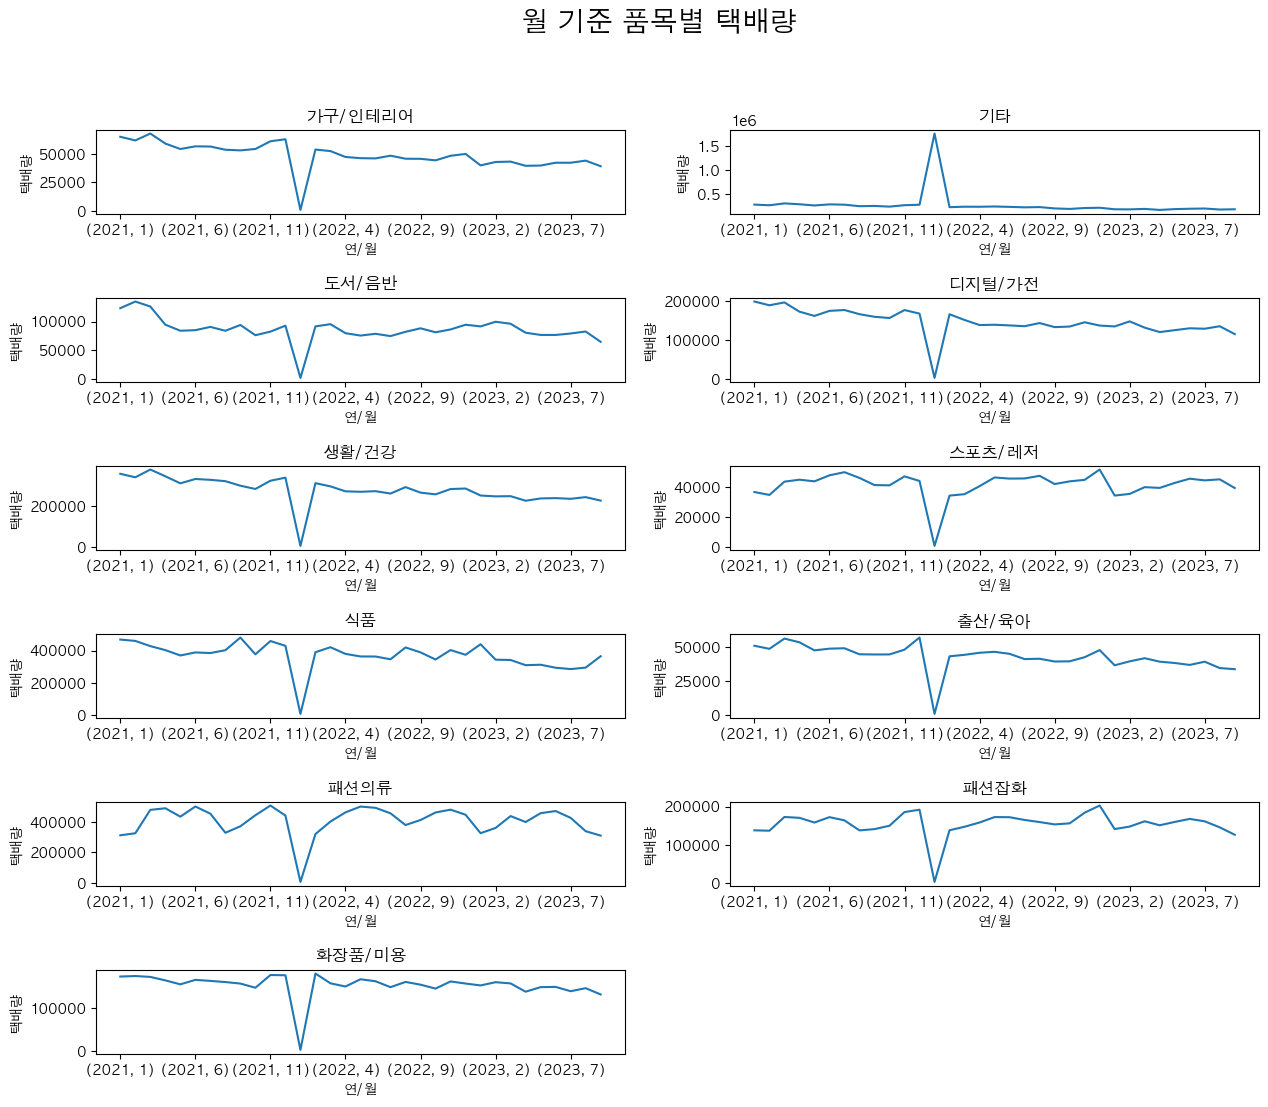

In [ ]:
# 월별 그래프로 이상치 확인
month_df = df.groupby(["year", "month"]).mean().drop(["배송년월일", "총량"], axis=1)

fig = plt.figure(figsize=(15, 12))
plt.rc('font',family = 'AppleGothic') # =========================================================================================================================

fig.suptitle("월 기준 품목별 택배량", fontweight="bold", fontsize=20)
count = 0
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)

for col in month_df.columns:
    count += 1
    fig.add_subplot(6, 2, count)
    month_df[col].plot.line()
    plt.title(col)
    plt.ylabel("택배량")
    plt.xlabel("연/월")

plt.savefig("월 품목별.png")
plt.show()

# 22년 1월 구간의 기타품목의 양이 현저하게 많은것을 확인 >> 타 품목이 전부 기타로 몰렸음이 예상됨

In [ ]:
df2201 = df[df["배송년월일"].between("2022-01-01", "2022-01-31")]
df2201
# 369행을 제외한 데이터에 조정이 필요

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month
365,2022-01-01,0.0,56595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56595.0,2022,1
366,2022-01-02,0.0,252405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252405.0,2022,1
367,2022-01-03,0.0,4032978.0,56.0,3.0,38.0,3.0,7.0,11.0,18.0,109.0,0.0,4033223.0,2022,1
368,2022-01-04,3.0,2666064.0,551.0,282.0,1373.0,0.0,273.0,145.0,837.0,160.0,674.0,2670362.0,2022,1
369,2022-01-05,34855.0,1284764.0,67753.0,118304.0,204081.0,24718.0,221280.0,23471.0,250125.0,110508.0,106141.0,2446000.0,2022,1
370,2022-01-06,0.0,2325194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2325194.0,2022,1
371,2022-01-07,0.0,2161387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2161387.0,2022,1
372,2022-01-08,0.0,381696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381696.0,2022,1
373,2022-01-09,0.0,272002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272002.0,2022,1
374,2022-01-10,0.0,3878642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3878642.0,2022,1


In [ ]:
# 이상치 범위 중 정상데이터 지정
df220105 = df.iloc[369, :]
df220105

배송년월일      2022-01-05 00:00:00
가구/인테리어                34855.0
기타                   1284764.0
도서/음반                  67753.0
디지털/가전                118304.0
생활/건강                 204081.0
스포츠/레저                 24718.0
식품                    221280.0
출산/육아                  23471.0
패션의류                  250125.0
패션잡화                  110508.0
화장품/미용                106141.0
총량                   2446000.0
year                      2022
month                        1
Name: 369, dtype: object

In [ ]:
# 전체 기간 품목별 비율 확인
error_idx = list(range(365, 396))  # 이상치가 존재하는 열
temp_df = df.drop(index=error_idx).drop(["year", "month"], axis=1)  # 이상치를 제외하여 비율 확인을 위한 데이터 프레임 생성
temp_sum = temp_df.sum(numeric_only=True)  # 총합 프레임 생성
temp_idx = temp_sum.index[:-1]  # 총합을 제외한 인덱스값 리스트화
rate_list = []  # 비율 리스트 생성
for idx in temp_idx:
    rate_list.append(round((temp_sum[idx]/temp_sum["총량"]), 3))
print(rate_list)
print(sum(rate_list))

[0.025, 0.118, 0.044, 0.075, 0.143, 0.021, 0.189, 0.022, 0.207, 0.079, 0.078]
1.001


In [ ]:
# 이상치 범위 지정
replace = df2201.iloc[:, 1:-3]
replace

,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
365,0.0,56595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366,0.0,252405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,0.0,4032978.0,56.0,3.0,38.0,3.0,7.0,11.0,18.0,109.0,0.0
368,3.0,2666064.0,551.0,282.0,1373.0,0.0,273.0,145.0,837.0,160.0,674.0
369,34855.0,1284764.0,67753.0,118304.0,204081.0,24718.0,221280.0,23471.0,250125.0,110508.0,106141.0
370,0.0,2325194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,0.0,2161387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,0.0,381696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,0.0,272002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374,0.0,3878642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
day_sum = df2201.drop(["배송년월일", "총량", "year", "month"], axis=1).sum(axis=1)
day_sum

365      56595.0
366     252405.0
367    4033223.0
368    2670362.0
369    2446000.0
370    2325194.0
371    2161387.0
372     381696.0
373     272002.0
374    3878642.0
375    2585406.0
376    2406811.0
377    2370842.0
378    2279562.0
379     423368.0
380     316344.0
381    4102153.0
382    2766594.0
383    2597838.0
384    2649822.0
385    2522364.0
386     602094.0
387     539520.0
388    4307469.0
389    2884362.0
390    2319258.0
391    1214379.0
392     376156.0
393     144890.0
394      43968.0
395       6978.0
dtype: float64

In [ ]:
# 이상치의 기타 품목 비율에 따라 품목별 데이터 수정
column_list = replace.columns  # 반복할 품목명
pct = rate_list  # 품목별 퍼센트
oth = day_sum  # 이상 범위의 전체품목의 합
count = 0
for col in column_list:
    replace[col] = oth * pct[count]
    count += 1
replace = replace.astype(int)

In [ ]:
# 변경된 이상치 확인
replace

,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
365,1414,6678,2490,4244,8093,1188,10696,1245,11715,4471,4414
366,6310,29783,11105,18930,36093,5300,47704,5552,52247,19939,19687
367,100830,475920,177461,302491,576750,84697,762279,88730,834877,318624,314591
368,66759,315102,117495,200277,381861,56077,504698,58747,552764,210958,208288
369,61150,288628,107624,183450,349778,51366,462294,53812,506322,193234,190788
370,58129,274372,102308,174389,332502,48829,439461,51154,481315,183690,181365
371,54034,255043,95101,162104,309078,45389,408502,47550,447407,170749,168588
372,9542,45040,16794,28627,54582,8015,72140,8397,79011,30153,29772
373,6800,32096,11968,20400,38896,5712,51408,5984,56304,21488,21216
374,96966,457679,170660,290898,554645,81451,733063,85330,802878,306412,302534


In [ ]:
# 기존 데이터프레임 수정
df.iloc[365:396, 1:-3] = replace

In [ ]:
# 수정된 이상치 범위중 정상 데이터 범위 정상데이터로 수정
df.iloc[369] = df220105

In [ ]:
# 이상치 처리된 데이터 확인
df[df["배송년월일"].between("2022-01-01", "2022-01-31")]

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month
365,2022-01-01,1414.0,6678.0,2490.0,4244.0,8093.0,1188.0,10696.0,1245.0,11715.0,4471.0,4414.0,56595.0,2022,1
366,2022-01-02,6310.0,29783.0,11105.0,18930.0,36093.0,5300.0,47704.0,5552.0,52247.0,19939.0,19687.0,252405.0,2022,1
367,2022-01-03,100830.0,475920.0,177461.0,302491.0,576750.0,84697.0,762279.0,88730.0,834877.0,318624.0,314591.0,4033223.0,2022,1
368,2022-01-04,66759.0,315102.0,117495.0,200277.0,381861.0,56077.0,504698.0,58747.0,552764.0,210958.0,208288.0,2670362.0,2022,1
369,2022-01-05,34855.0,1284764.0,67753.0,118304.0,204081.0,24718.0,221280.0,23471.0,250125.0,110508.0,106141.0,2446000.0,2022,1
370,2022-01-06,58129.0,274372.0,102308.0,174389.0,332502.0,48829.0,439461.0,51154.0,481315.0,183690.0,181365.0,2325194.0,2022,1
371,2022-01-07,54034.0,255043.0,95101.0,162104.0,309078.0,45389.0,408502.0,47550.0,447407.0,170749.0,168588.0,2161387.0,2022,1
372,2022-01-08,9542.0,45040.0,16794.0,28627.0,54582.0,8015.0,72140.0,8397.0,79011.0,30153.0,29772.0,381696.0,2022,1
373,2022-01-09,6800.0,32096.0,11968.0,20400.0,38896.0,5712.0,51408.0,5984.0,56304.0,21488.0,21216.0,272002.0,2022,1
374,2022-01-10,96966.0,457679.0,170660.0,290898.0,554645.0,81451.0,733063.0,85330.0,802878.0,306412.0,302534.0,3878642.0,2022,1


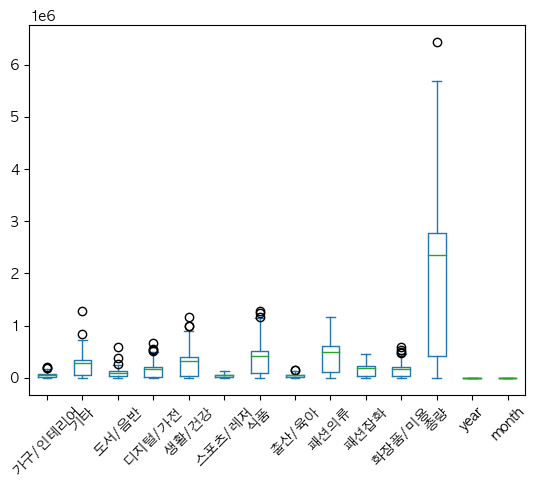

In [ ]:
# 기타품목 이상치 제거 확인
plt.rc('font',family = 'AppleGothic') #========================================================================================= 폰트
df.groupby("배송년월일").sum().plot.box()
plt.xticks(rotation=45)
plt.show()

# 전체기간 분석

## 전국 일별 배송 건수 그래프

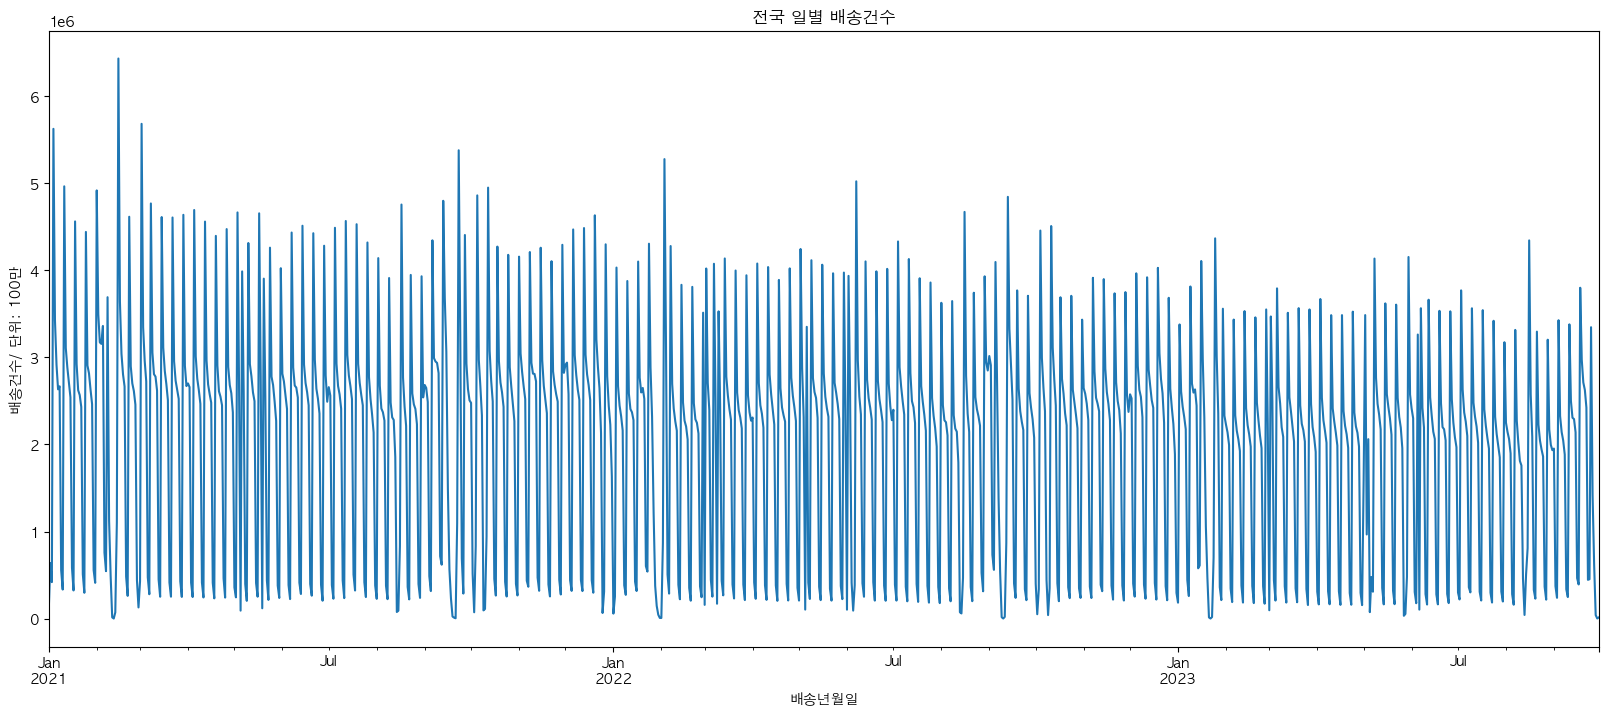

In [ ]:
plt.figure(figsize=(20, 8))
df.set_index("배송년월일")["총량"].plot.line()
plt.ylabel("배송건수/ 단위: 100만")
plt.title("전국 일별 배송건수")
plt.savefig("전국 일별 배송")
plt.show()

## 월단위 총합 배송량 분석 그래프

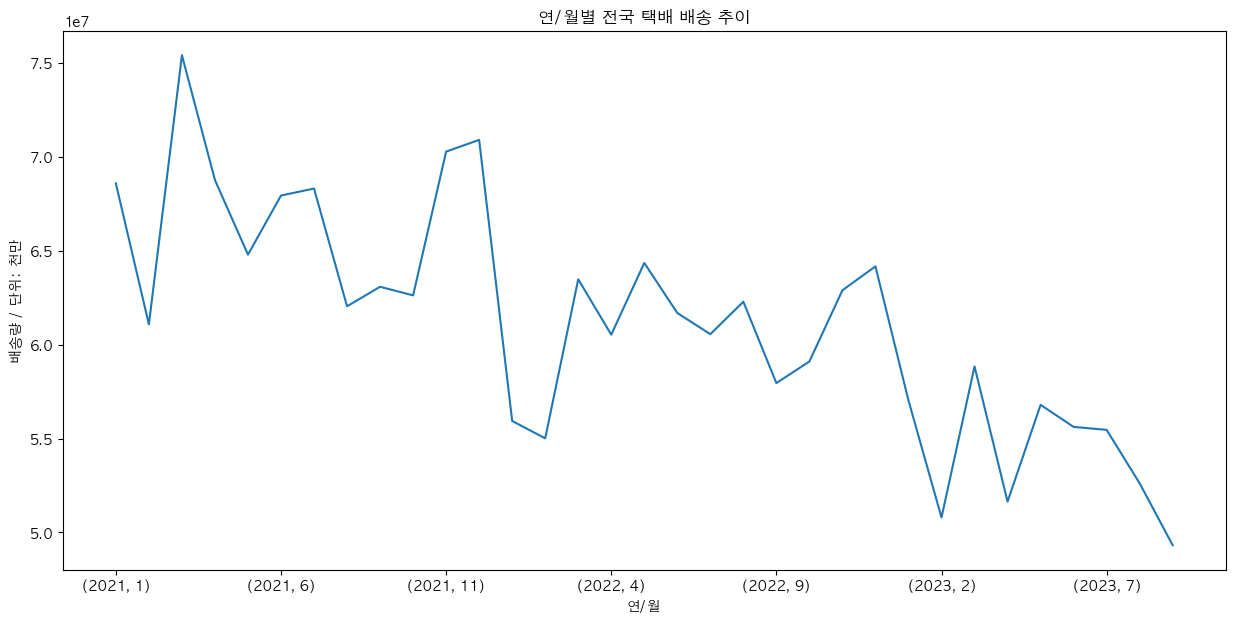

In [ ]:
plt.figure(figsize=(15, 7))
df.groupby(["year", "month"])["총량"].sum(numeric_only=True).plot.line()
plt.title("연/월별 전국 택배 배송 추이")
plt.xlabel("연/월")
plt.ylabel("배송량")
plt.savefig("연월별 전국 배송")
plt.ylabel("배송량 / 단위: 천만")
plt.show()

- 전체적으로 우하향세를 그리고있음 : 코로나의 영향으로 택배량이 늘었다가 잠잠해짐에 따라 줄어듦으로 예상됨

## 연도별 분석

In [ ]:
df21 = df[(df["배송년월일"].dt.year) == 2021]
df22 = df[(df["배송년월일"].dt.year) == 2022]
df23 = df[(df["배송년월일"].dt.year) == 2023]
df23

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month
730,2023-01-01,1664.0,14021.0,50980.0,3139.0,24557.0,755.0,36371.0,2464.0,19472.0,10224.0,18742.0,182389.0,2023,1
731,2023-01-02,83308.0,352210.0,157009.0,277542.0,515566.0,79874.0,672119.0,72840.0,573023.0,279584.0,316399.0,3379474.0,2023,1
732,2023-01-03,59639.0,288415.0,128417.0,190900.0,373517.0,52390.0,518083.0,50257.0,518752.0,225296.0,203527.0,2609193.0,2023,1
733,2023-01-04,54230.0,255944.0,126413.0,179663.0,352579.0,50794.0,517689.0,49912.0,464431.0,201012.0,181219.0,2433886.0,2023,1
734,2023-01-05,48490.0,247046.0,114301.0,160507.0,330638.0,45063.0,509135.0,46944.0,442332.0,191181.0,181572.0,2317209.0,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0,1416490.0,2023,9
999,2023-09-27,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0,618901.0,2023,9
1000,2023-09-28,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0,39668.0,2023,9
1001,2023-09-29,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0,594.0,2023,9


In [ ]:
df22.groupby("month")["가구/인테리어"].mean()

month
1     44262.419355
2     53615.785714
3     52298.096774
4     47170.266667
5     46134.451613
6     45927.266667
7     48297.709677
8     45647.096774
9     45565.533333
10    44234.806452
11    48209.166667
12    49809.258065
Name: 가구/인테리어, dtype: float64

In [ ]:
df21.groupby("month")["총량"]

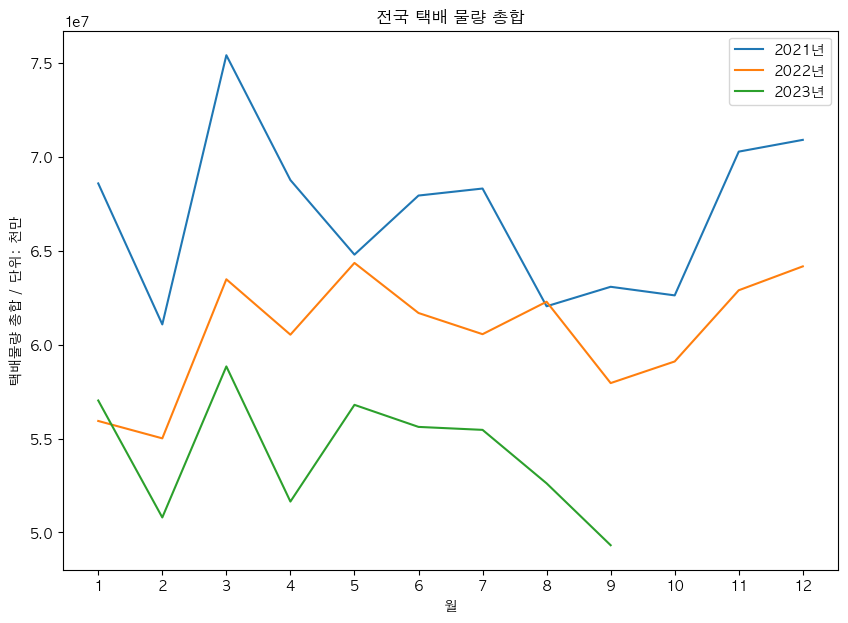

In [ ]:
plt.figure(figsize=(10, 7))
df21.groupby("month")["총량"].sum().plot.line(label="2021년")
df22.groupby("month")["총량"].sum().plot.line(label="2022년")
df23.groupby("month")["총량"].sum().plot.line(label="2023년")
plt.xticks(range(1, 13))
plt.title("전국 택배 물량 총합")
plt.ylabel("택배물량 총합 / 단위: 천만")
plt.xlabel("월")
plt.legend()
plt.savefig("연도별 택배 총합")
plt.show()

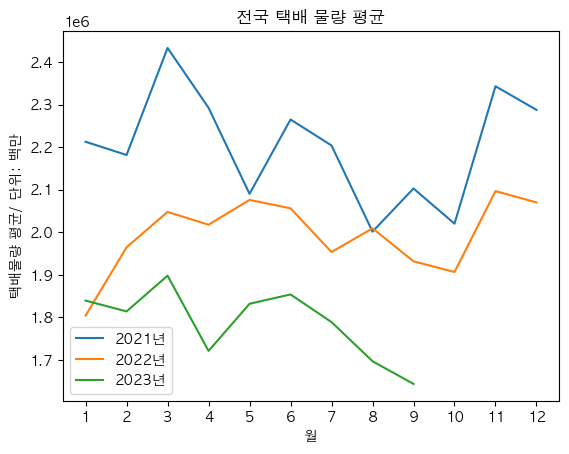

In [ ]:
df21.groupby("month")["총량"].mean().plot.line(label="2021년")
df22.groupby("month")["총량"].mean().plot.line(label="2022년")
df23.groupby("month")["총량"].mean().plot.line(label="2023년")
plt.xticks(range(1, 13))
plt.title("전국 택배 물량 평균")
plt.ylabel("택배물량 평균/ 단위: 백만")
plt.xlabel("월")
plt.legend()
plt.savefig("연도별 택배 평균")
plt.show()

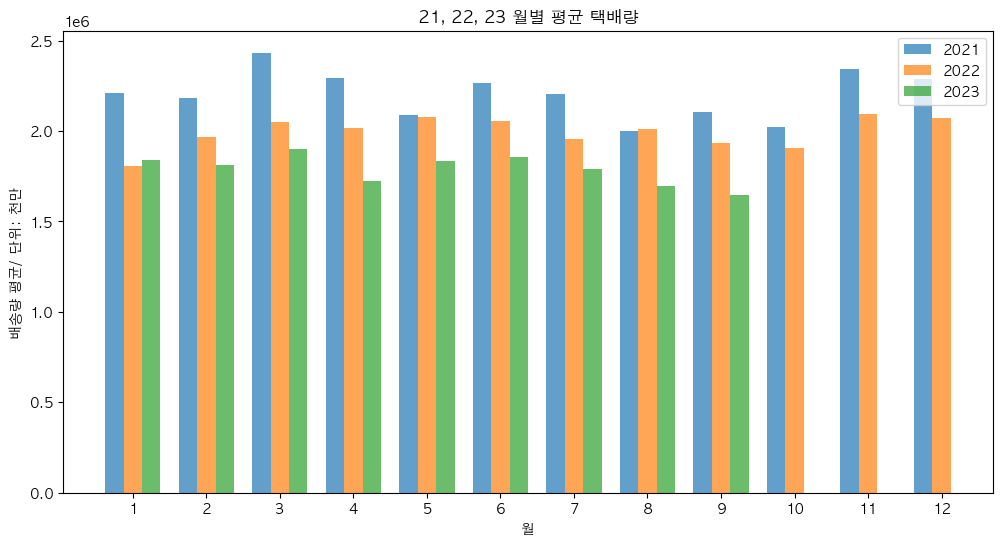

In [ ]:
# 데이터프레임에서 월별 평균값 추출
mean_2021 = df21.groupby("month")["총량"].mean()
mean_2022 = df22.groupby("month")["총량"].mean()
mean_2023 = df23.groupby("month")["총량"].mean()

plt.figure(figsize=(12, 6))

# 막대 그래프로 각 연도의 월별 평균값 표현
plt.bar(range(1, 13), mean_2021, label='2021', alpha=0.7, width=0.25)
plt.bar([x + 0.25 for x in range(1, 13)], mean_2022, label='2022', alpha=0.7, width=0.25)
plt.bar([x + 0.5 for x in range(1, 10)], mean_2023, label='2023', alpha=0.7, width=0.25)

plt.title('21, 22, 23 월별 평균 택배량')
plt.xlabel('월')
plt.ylabel('배송량 평균/ 단위: 천만')
plt.xticks([x + 0.25 for x in range(1, 13)], labels=mean_2021.index)
plt.legend()

plt.show()

# 년이 지날수록 택배의 총량이 감소 중

- 전체적으로 3월에 배송량이 많으며 4월에 꺾이는 경향을 보임
- 21, 22년 데이터를 봤을때 11월부터 배송량이 늘것으로 예상됨

In [ ]:
df.drop(["배송년월일", "month", "year", "총량"], axis=1)

,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,458.0,6489.0,46878.0,5552.0,7243.0,1993.0,20759.0,4951.0,4557.0,3226.0,5950.0
1,8839.0,90981.0,74651.0,31576.0,70466.0,10171.0,111267.0,29229.0,122235.0,48099.0,39804.0
2,10361.0,11792.0,58227.0,15360.0,50975.0,2521.0,180003.0,7594.0,31245.0,10224.0,40257.0
3,191370.0,684172.0,262651.0,546555.0,994424.0,117510.0,1064841.0,126567.0,788938.0,363482.0,487006.0
4,107411.0,439273.0,196770.0,321254.0,553526.0,57375.0,657007.0,86460.0,521622.0,237004.0,248600.0
...,...,...,...,...,...,...,...,...,...,...,...
998,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0
999,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0
1000,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0
1001,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0


In [ ]:
month_df = df.groupby(["year", "month"]).mean().drop(["배송년월일", "총량"], axis=1)
month_df

가구/인테리어             기타          도서/음반         디지털/가전  \
year month                                                              
2021 1      64729.225806  288199.161290  123426.419355  198731.354839   
     2      61567.321429  274427.678571  134953.142857  189185.642857   
     3      67557.419355  313117.032258  126287.612903  196439.419355   
     4      58832.133333  295336.733333   94731.900000  172903.933333   
     5      54088.000000  270116.451613   84183.225806  162041.483871   
     6      56428.533333  292850.166667   85188.033333  174896.233333   
     7      56256.064516  286797.129032   90866.258065  177120.838710   
     8      53476.580645  255342.483871   84140.548387  166440.161290   
     9      52896.266667  260026.233333   94219.566667  159825.766667   
     10     54124.290323  246123.548387   76413.645161  156682.774194   
     11     60840.766667  275374.366667   82661.166667  177007.500000   
     12     62585.838710  285452.096774   93006.193548  167926.903226   
2022 1      44262.419355  245057.032258   78108.806452  133231.225806   
     2      53615.785714  234804.821429   91750.928571  166279.714286   
     3      52298.096774  244496.709677   95627.193548  151670.741935   
     4      47170.266667  243277.933333   79933.700000  138755.966667   
     5      46134.451613  248980.193548   75811.516129  139472.354839   
     6      45927.266667  240820.600000   78869.933333  137823.000000   
     7      48297.709677  231161.064516   74893.322581  135758.903226   
     8      45647.096774  236639.451613   82343.838710  143803.129032   
     9      45565.533333  208523.066667   88426.200000  133418.600000   
     10     44234.806452  198169.451613   81536.032258  134868.225806   
     11     48209.166667  216744.133333   86411.366667  145822.366667   
     12     49809.258065  222954.612903   94629.258065  137432.322581   
2023 1      39860.290323  190686.580645   91703.129032  135185.580645   
     2      42804.250000  189113.607143   99797.392857  148104.250000   
     3      43134.903226  198099.774194   96319.290323  132049.354839   
     4      39491.800000  177795.466667   80730.300000  120823.133333   
     5      39717.258065  194073.064516   76907.064516  125678.741935   
     6      42160.266667  201934.833333   76892.233333  130461.033333   
     7      42154.645161  206795.258065   79376.129032  129331.935484   
     8      43987.322581  185610.709677   82879.612903  135715.225806   
     9      39114.966667  190641.033333   64912.833333  115582.133333   

                    생활/건강        스포츠/레저             식품         출산/육아  \
year month                                                             
2021 1      358621.032258  36685.354839  468848.645161  51225.967742   
     2      341594.250000  34739.500000  460348.214286  48948.571429   
     3      379402.903226  43581.096774  428174.580645  56547.096774   
     4      346441.633333  44897.366667  403336.866667  53788.900000   
     5      312107.419355  43800.677419  369985.935484  47815.387097   
     6      333245.566667  47798.033333  388949.666667  49073.066667   
     7      329260.451613  49892.419355  385117.741935  49374.387097   
     8      322572.838710  46081.451613  402752.290323  44910.516129   
     9      300497.700000  41303.366667  481382.800000  44767.133333   
     10     284522.419355  41127.161290  377181.096774  44798.193548   
     11     324712.666667  47088.800000  459578.866667  48341.600000   
     12     339714.580645  44045.451613  429912.193548  57309.677419   
2022 1      253334.709677  37033.161290  333264.322581  38718.548387   
     2      312931.321429  34298.535714  390188.285714  43402.678571   
     3      297168.161290  35241.419355  421309.935484  44516.903226   
     4      273130.033333  40589.666667  379881.200000  46040.933333   
     5      270851.451613  46377.096774  363974.838710  46741.580645   
     6      273817.333333  45615.266667  363557.600000  45233.300000   
     7      262112.45

## 분기별 품목 동향 그래프

In [ ]:
df["quarter"] = df["배송년월일"].dt.quarter
df
quarter_df = df.groupby(["year", "quarter"]).mean()
quarter_df.index = ['21-1','21-2','21-3','21-4','22-1','22-2','22-3','22-4','23-1','23-2','23-3']
quarter_df = quarter_df.drop(["배송년월일", "총량", "month"], axis=1)
quarter_df

,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
21-1,64719.677778,292497.522222,127998.033333,194972.133333,360482.011111,38455.177778,452194.111111,52350.277778,372849.322222,149871.511111,172416.466667
21-2,56423.604396,285925.461538,87992.065934,169860.340659,330395.010989,45480.032967,387232.527473,50199.296703,472916.065934,167211.879121,160800.131868
21-3,54223.913043,267468.641304,89693.456522,167882.217391,317627.858696,45807.510870,422450.597826,46367.891304,383877.847826,147913.054348,159425.369565
21-4,59165.619565,268913.869565,84041.847826,167099.184783,316225.293478,44054.510870,421818.021739,50169.478261,462267.902174,175914.945652,165807.945652
22-1,49940.200000,241674.455556,88387.133333,149864.366667,286974.066667,35565.233333,381300.822222,42173.044444,363529.022222,142044.855556,157305.955556
22-2,46407.626374,244410.351648,78178.747253,138692.439560,272580.395604,44218.000000,369081.142857,46013.362637,483662.439560,167980.824176,159106.021978
22-3,46513.641304,225625.086957,81816.717391,137706.315217,274250.521739,45093.532609,385100.880435,40855.076087,414884.771739,159613.869565,153830.413043
22-4,47409.141304,212577.934783,87537.663043,139304.217391,276292.054348,46754.576087,373979.239130,43492.043478,461314.423913,181127.076087,153913.413043
23-1,41904.111111,192750.644444,95811.355556,138124.466667,250196.966667,36592.522222,376258.244444,39474.422222,374437.722222,150525.355556,155811.055556
23-2,40448.318681,191298.615385,78162.582418,125654.571429,235142.395604,42578.868132,305471.219780,38314.505495,441328.571429,159811.098901,144687.263736


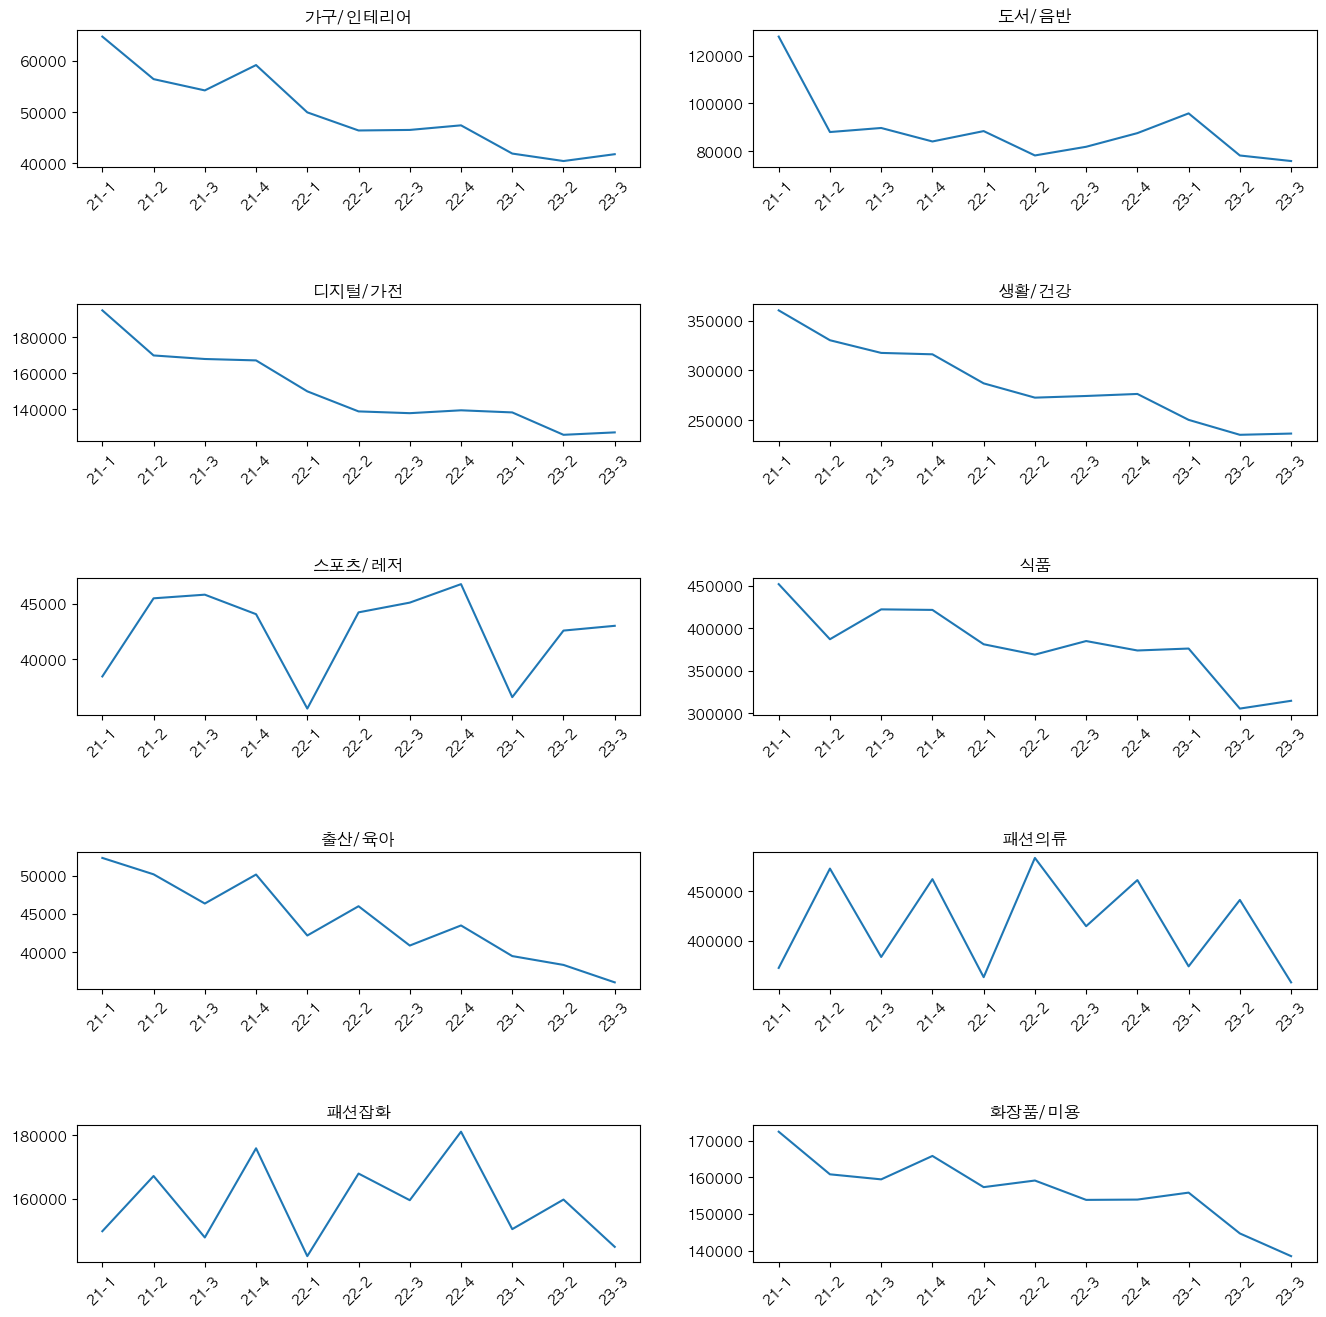

In [ ]:
col_list = quarter_df.columns

fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
count = 0

for col in column_list:
    if col == "기타":
        continue
    count +=1
    xs = quarter_df[col].index.values
    ys = quarter_df[col].values

    plt.subplot(5, 2, count)
    plt.title(col)
    plt.plot(xs, ys)
    plt.xticks(rotation=45)

plt.rc('font', family='AppleGothic')
plt.show()

- 스포츠/레저 , 패션의류, 패션잡화 품목의 경우 규칙적인 패턴을 보임 : 해당 분기에 홍보를 하면 효과적일것으로 예상됨

## 전체 기간 품목별 동향 그래프

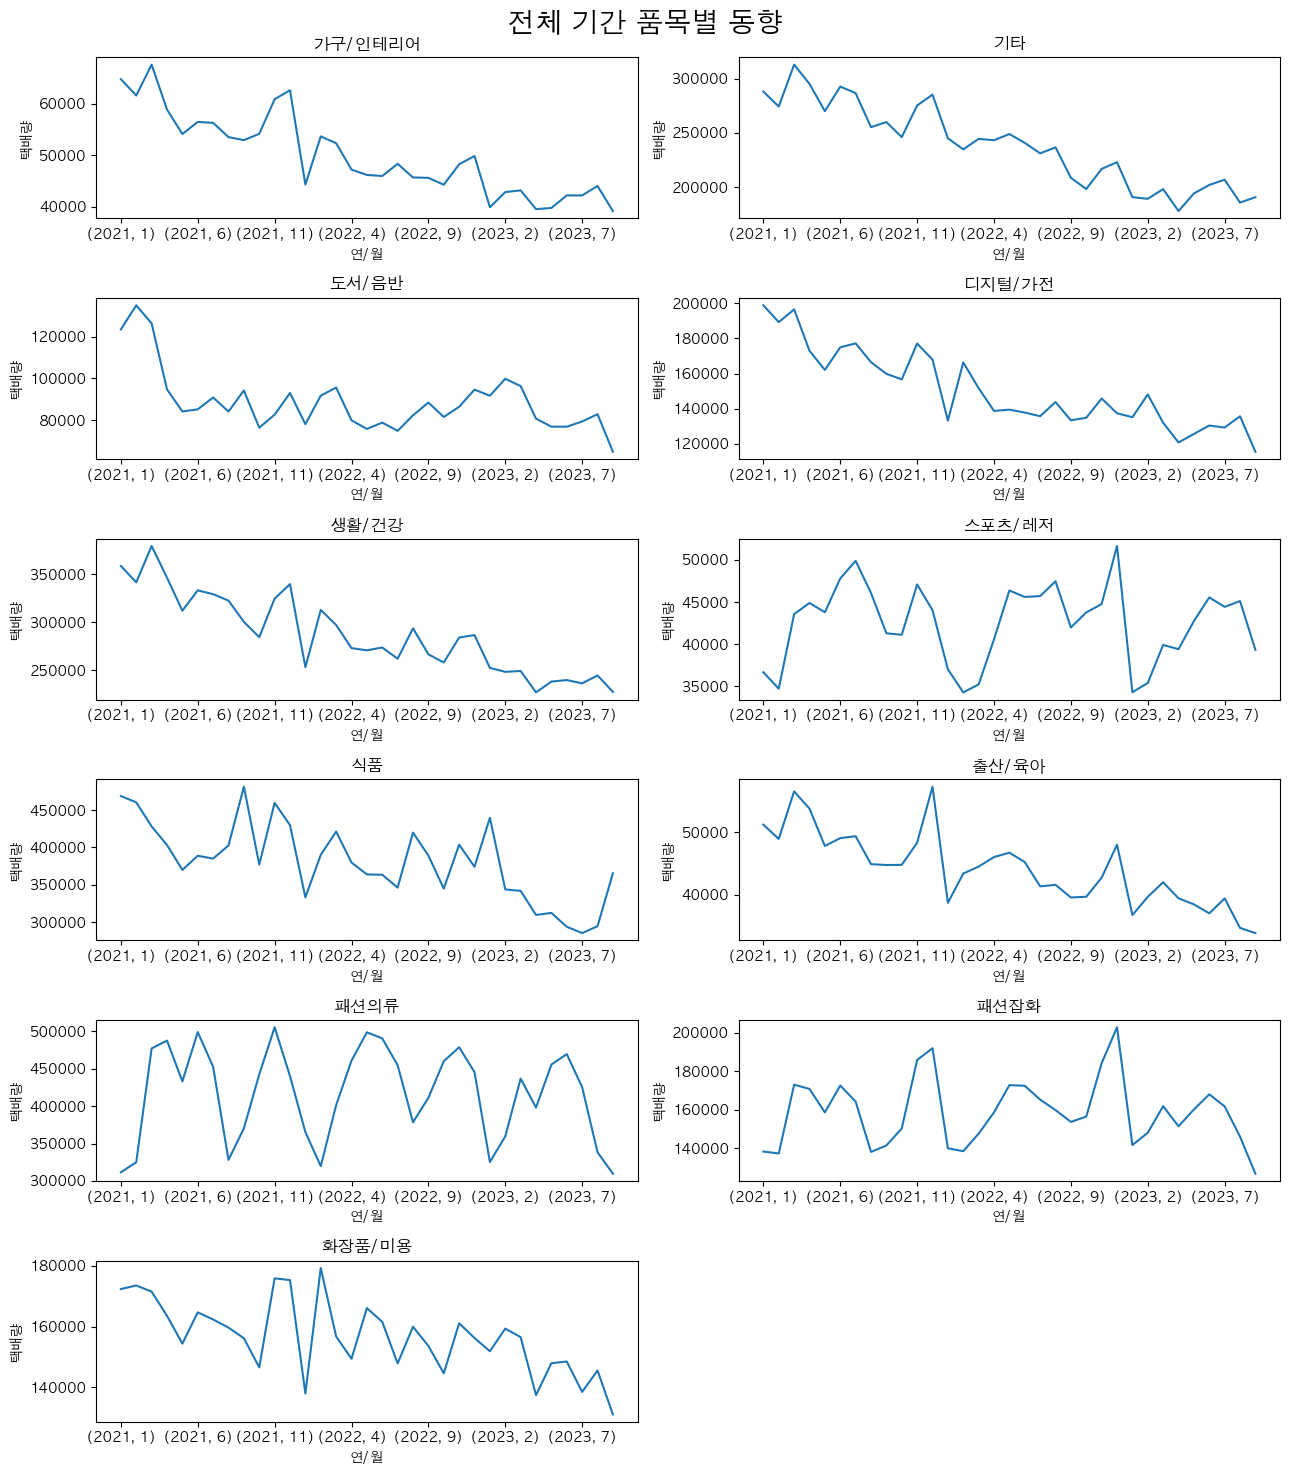

In [ ]:
fig = plt.figure(figsize=(13, 15))
plt.rc('font',family = 'AppleGothic') # =========================================================================================================================
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
fig.suptitle("전체 기간 품목별 동향", fontweight="bold", fontsize=20)
count = 0


for col in month_df.columns:
    count += 1
    fig.add_subplot(6, 2, count)
    month_df[col].plot.line()
    plt.title(col)
    plt.ylabel("택배량")
    plt.xlabel("연/월")

plt.tight_layout()
plt.savefig("월 품목별.png")
plt.show()

- 스포츠/레저 품목은 6~7월, 11~12월 기간에 수요가 큼
- 출산/육아 품목의 경우 11~12월 기간에 수요가 큼
- 패션의류 품목은 6월, 11월 기간에 수요가 큼
- 패션잡화 품목은 11월 기간에 수요가 큼

## 4개품목 분기별 분석

In [ ]:
df_quarter2 = df[(df['month']==4)|(df['month']==5)|(df['month']==6)].groupby(by=['year','month']).mean()
df_quarter3 = df[(df['month']==7)|(df['month']==8)|(df['month']==9)].groupby(by=['year','month']).mean()
df_quarter4 = df[(df['month']==10)|(df['month']==11)|(df['month']==12)].groupby(by=['year','month']).mean()

### 스포츠/레저 분석

In [ ]:
sports_qt2 = df_quarter2[["스포츠/레저"]]
sports_qt2.index = ['21년 4월','21년 5월','21년 6월','22년 4월','22년 5월','22년 6월','23년 4월','23년 5월','23년 6월']
sports_qt3 = df_quarter3[["스포츠/레저"]]
sports_qt3.index = ['21년 7월','21년 8월','21년 9월','22년 7월','22년 8월','22년 9월','23년 7월','23년 8월','23년 9월']
sports_qt4 = df_quarter4[["스포츠/레저"]]
sports_qt4.index = ['21년 10월','21년 11월','21년 12월','22년 10월','22년 11월','22년 12월']

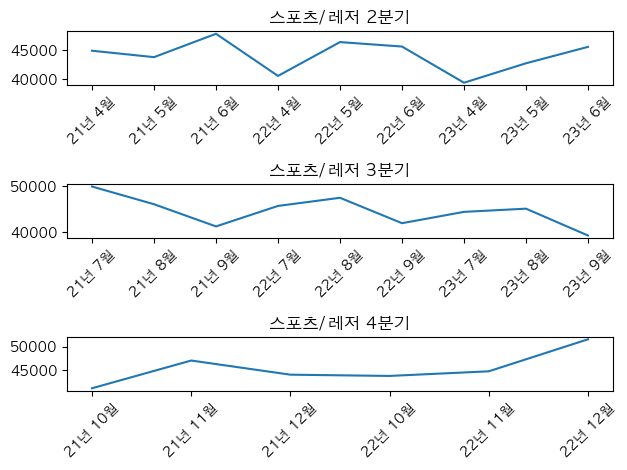

In [ ]:
plt.subplot(3,1,1)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
plt.title('스포츠/레저 2분기')
plt.plot(sports_qt2.index.values, sports_qt2.values)
plt.xticks(rotation=45)

plt.subplot(3, 1,2)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
plt.title('스포츠/레저 3분기')
plt.plot(sports_qt3.index.values, sports_qt3.values)
plt.xticks(rotation=45)

plt.subplot(3,1,3)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
plt.title('스포츠/레저 4분기')
plt.plot(sports_qt4.index.values, sports_qt4.values)
plt.xticks(rotation=45)

plt.tight_layout()

- 스포츠/레저 품목의 경우 여름 시즌인 6,7,8월과 겨율 시즌인 11월, 12월에 수요가 많음을 알 수 있음

### 패션의류 분석

In [ ]:
fs_qt2 = df_quarter2[['패션의류']]
fs_qt2.index = ['21년 4월','21년 5월','21년 6월','22년 4월','22년 5월','22년 6월','23년 4월','23년 5월','23년 6월']

fs_qt4 = df_quarter4[["패션의류"]]
fs_qt4.index = ['21년 10월','21년 11월','21년 12월','22년 10월','22년 11월','22년 12월']

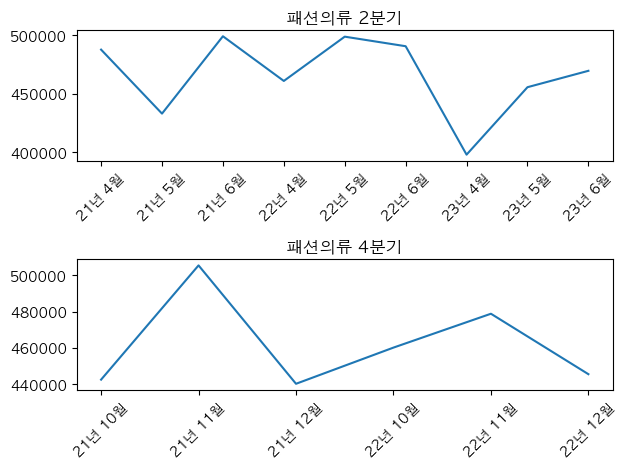

In [ ]:
plt.subplot(2,1,1)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
plt.title('패션의류 2분기')
plt.plot(fs_qt2.index.values, fs_qt2.values)
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.subplots_adjust(wspace = 0.2, hspace = 1.0)
plt.title('패션의류 4분기')
plt.plot(fs_qt4.index.values, fs_qt4.values)
plt.xticks(rotation=45)

plt.tight_layout()

- 패션의류는 2분기의 경우 6월, 4분기의 경우 11월이 수요가 가장 많은것으로 보임

### 패션잡화 분석

In [ ]:
fs2_qt4 = df_quarter4[["패션잡화"]]
fs2_qt4.index = ['21년 10월','21년 11월','21년 12월','22년 10월','22년 11월','22년 12월']

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '21년 10월'),
  Text(1, 0, '21년 11월'),
  Text(2, 0, '21년 12월'),
  Text(3, 0, '22년 10월'),
  Text(4, 0, '22년 11월'),
  Text(5, 0, '22년 12월')])

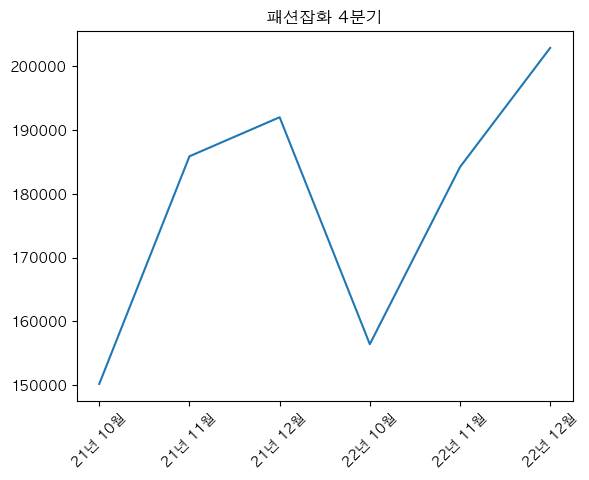

In [ ]:
plt.title('패션잡화 4분기')
plt.plot(fs2_qt4.index.values, fs2_qt4.values)
plt.xticks(rotation=45)

- 패션잡화의 경우 11월, 12월에 수요가 가장 많음을 알 수 있음

## 전체 품목별 상관관계

In [ ]:
df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month,quarter
0,2021-01-01,458.0,6489.0,46878.0,5552.0,7243.0,1993.0,20759.0,4951.0,4557.0,3226.0,5950.0,108056.0,2021,1,1
1,2021-01-02,8839.0,90981.0,74651.0,31576.0,70466.0,10171.0,111267.0,29229.0,122235.0,48099.0,39804.0,637318.0,2021,1,1
2,2021-01-03,10361.0,11792.0,58227.0,15360.0,50975.0,2521.0,180003.0,7594.0,31245.0,10224.0,40257.0,418559.0,2021,1,1
3,2021-01-04,191370.0,684172.0,262651.0,546555.0,994424.0,117510.0,1064841.0,126567.0,788938.0,363482.0,487006.0,5627516.0,2021,1,1
4,2021-01-05,107411.0,439273.0,196770.0,321254.0,553526.0,57375.0,657007.0,86460.0,521622.0,237004.0,248600.0,3426302.0,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0,1416490.0,2023,9,3
999,2023-09-27,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0,618901.0,2023,9,3
1000,2023-09-28,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0,39668.0,2023,9,3
1001,2023-09-29,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0,594.0,2023,9,3


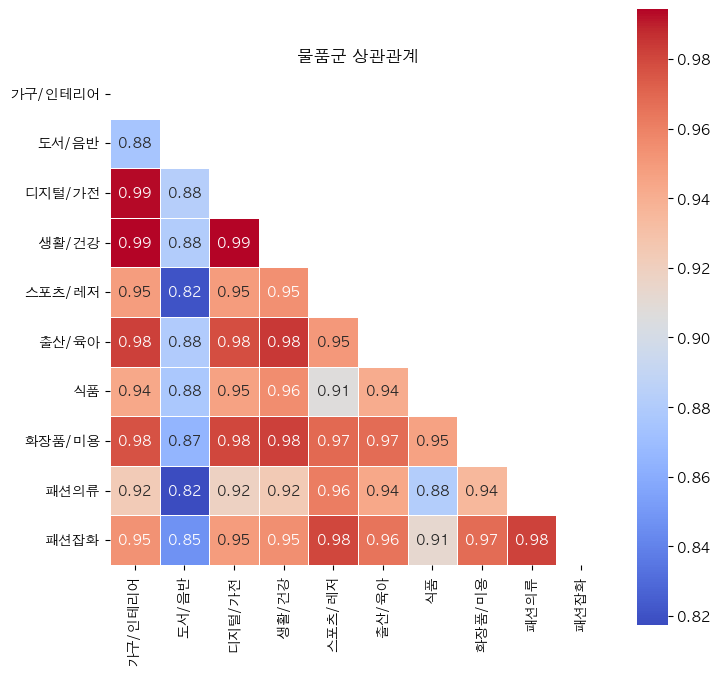

In [ ]:
corr_matrix = df[['가구/인테리어', '도서/음반', '디지털/가전', '생활/건강','스포츠/레저', '출산/육아', '식품', '화장품/미용', '패션의류', "패션잡화"]].corr('pearson')
plt.rc('font',family = 'AppleGothic')

# 히트맵 그려보기
plt.figure(figsize=(8, 8))
upp_mat = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, square=True, mask=upp_mat)
plt.title('물품군 상관관계')
plt.show()

- 값이 전체적으로 높아 품목끼리 묶어파는 전략에 사용 가능할지 모르겠음

------

# 특정기간 데이터 분석

In [ ]:
df

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량,year,month,quarter
0,2021-01-01,458.0,6489.0,46878.0,5552.0,7243.0,1993.0,20759.0,4951.0,4557.0,3226.0,5950.0,108056.0,2021,1,1
1,2021-01-02,8839.0,90981.0,74651.0,31576.0,70466.0,10171.0,111267.0,29229.0,122235.0,48099.0,39804.0,637318.0,2021,1,1
2,2021-01-03,10361.0,11792.0,58227.0,15360.0,50975.0,2521.0,180003.0,7594.0,31245.0,10224.0,40257.0,418559.0,2021,1,1
3,2021-01-04,191370.0,684172.0,262651.0,546555.0,994424.0,117510.0,1064841.0,126567.0,788938.0,363482.0,487006.0,5627516.0,2021,1,1
4,2021-01-05,107411.0,439273.0,196770.0,321254.0,553526.0,57375.0,657007.0,86460.0,521622.0,237004.0,248600.0,3426302.0,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0,1416490.0,2023,9,3
999,2023-09-27,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0,618901.0,2023,9,3
1000,2023-09-28,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0,39668.0,2023,9,3
1001,2023-09-29,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0,594.0,2023,9,3


In [ ]:
df2 = df.drop(["year", "month", "quarter"], axis=1)

In [ ]:
df2

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총량
0,2021-01-01,458.0,6489.0,46878.0,5552.0,7243.0,1993.0,20759.0,4951.0,4557.0,3226.0,5950.0,108056.0
1,2021-01-02,8839.0,90981.0,74651.0,31576.0,70466.0,10171.0,111267.0,29229.0,122235.0,48099.0,39804.0,637318.0
2,2021-01-03,10361.0,11792.0,58227.0,15360.0,50975.0,2521.0,180003.0,7594.0,31245.0,10224.0,40257.0,418559.0
3,2021-01-04,191370.0,684172.0,262651.0,546555.0,994424.0,117510.0,1064841.0,126567.0,788938.0,363482.0,487006.0,5627516.0
4,2021-01-05,107411.0,439273.0,196770.0,321254.0,553526.0,57375.0,657007.0,86460.0,521622.0,237004.0,248600.0,3426302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,33940.0,156099.0,53171.0,103063.0,181035.0,34940.0,164692.0,32928.0,418965.0,127126.0,110531.0,1416490.0
999,2023-09-27,14770.0,65391.0,21533.0,38772.0,69220.0,16996.0,76167.0,16954.0,196128.0,58588.0,44382.0,618901.0
1000,2023-09-28,1189.0,5229.0,587.0,6530.0,4825.0,2818.0,2422.0,1099.0,5704.0,7528.0,1737.0,39668.0
1001,2023-09-29,3.0,0.0,0.0,0.0,0.0,3.0,567.0,0.0,21.0,0.0,0.0,594.0


## 설 연휴

/var/folders/56/r9lm75lj1j51hmc32pl02zn00000gn/T/ipykernel_69836/4175083270.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2021.drop(['총량'],axis=1, inplace=True)
/var/folders/56/r9lm75lj1j51hmc32pl02zn00000gn/T/ipykernel_69836/4175083270.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2022.drop(['총량'],axis=1, inplace=True)
/var/folders/56/r9lm75lj1j51hmc32pl02zn00000gn/T/ipykernel_69836/4175083270.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

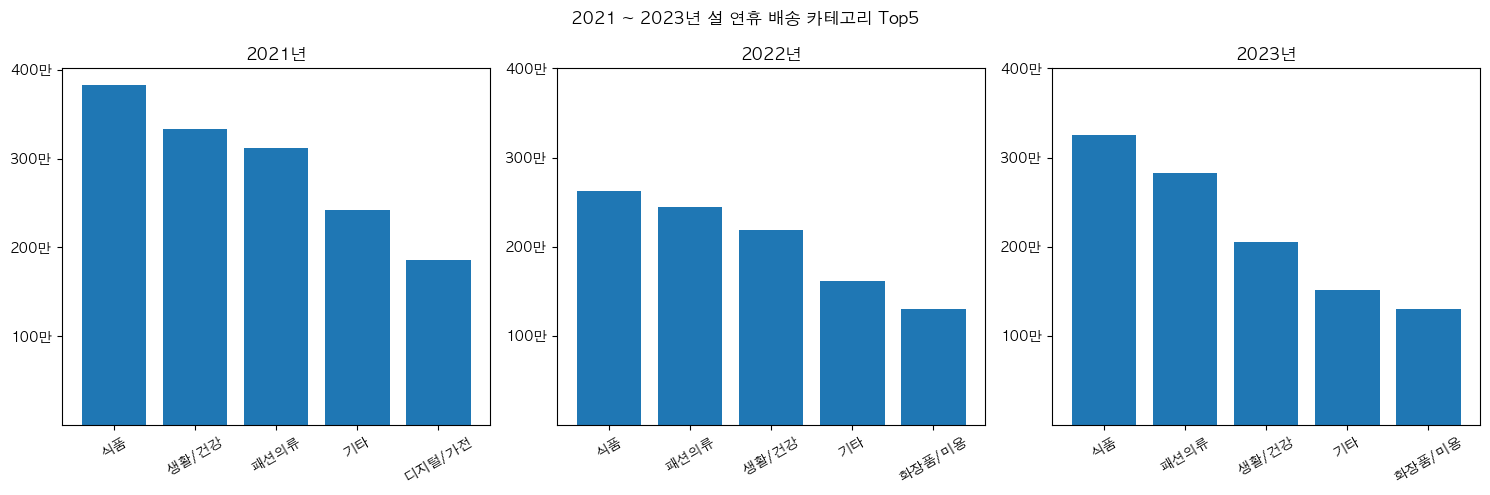

In [ ]:
# 2021년 설 연휴 전후 --> 2021-02-07 ~ 2021-02-17  / 평일8 주말3
# 2022년 설 연휴 전후 --> 2022-01-26 ~ 2022-02-05  / 평일8 주말3
# 2023년 설 연휴 전후 --> 2023-01-17 ~ 2023-01-26  / 평일8 주말2

# 라이브러리 호출
import matplotlib.pyplot as plt

# 필요 데이터 추출
con_2021 = df2['배송년월일'].between('2021-02-07', '2021-02-17')
new_2021 = df2[con_2021]

con_2022 = df2['배송년월일'].between('2022-01-26', '2022-02-05')
new_2022 = df2[con_2022]

con_2023 = df2['배송년월일'].between('2023-01-17', '2023-01-26')
new_2023 = df2[con_2023]

# 데이터 전처리

new_2021.drop(['총량'],axis=1, inplace=True)
stat_2021 = new_2021.groupby('배송년월일').sum()
stat_1 = stat_2021.sum().sort_values(ascending=False)

new_2022.drop(['총량'],axis=1, inplace=True)
stat_2022 = new_2022.groupby('배송년월일').sum()
stat_2 = stat_2022.sum().sort_values(ascending=False)

new_2023.drop(['총량'],axis=1, inplace=True)
stat_2023 = new_2023.groupby('배송년월일').sum()
stat_3 = stat_2023.sum().sort_values(ascending=False)

# 시각화
fig = plt.figure(figsize=(15,5))
plt.rc('font', family='AppleGothic')
plt.suptitle('2021 ~ 2023년 설 연휴 배송 카테고리 Top5')

fig.add_subplot(1,3,1)
plt.title('2021년')
plt.bar(stat_1.index[:5], stat_1.values[:5])
plt.xticks(rotation=30)
plt.yticks([1000000, 2000000, 3000000, 4000000], labels=["100만", "200만", "300만", "400만"])

fig.add_subplot(1,3,2)
plt.title('2022년')
plt.bar(stat_2.index[:5], stat_2.values[:5])
plt.xticks(rotation=30)
plt.yticks([1000000, 2000000, 3000000, 4000000], labels=["100만", "200만", "300만", "400만"])

fig.add_subplot(1,3,3)
plt.title('2023년')
plt.bar(stat_3.index[:5], stat_3.values[:5])
plt.xticks(rotation=30)
plt.yticks([1000000, 2000000, 3000000, 4000000], labels=["100만", "200만", "300만", "400만"])

plt.tight_layout()

## 추석 연휴

/var/folders/56/r9lm75lj1j51hmc32pl02zn00000gn/T/ipykernel_69836/2095972985.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2021.drop(['총량'],axis=1, inplace=True)
/var/folders/56/r9lm75lj1j51hmc32pl02zn00000gn/T/ipykernel_69836/2095972985.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2022.drop(['총량'],axis=1, inplace=True)
/var/folders/56/r9lm75lj1j51hmc32pl02zn00000gn/T/ipykernel_69836/2095972985.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

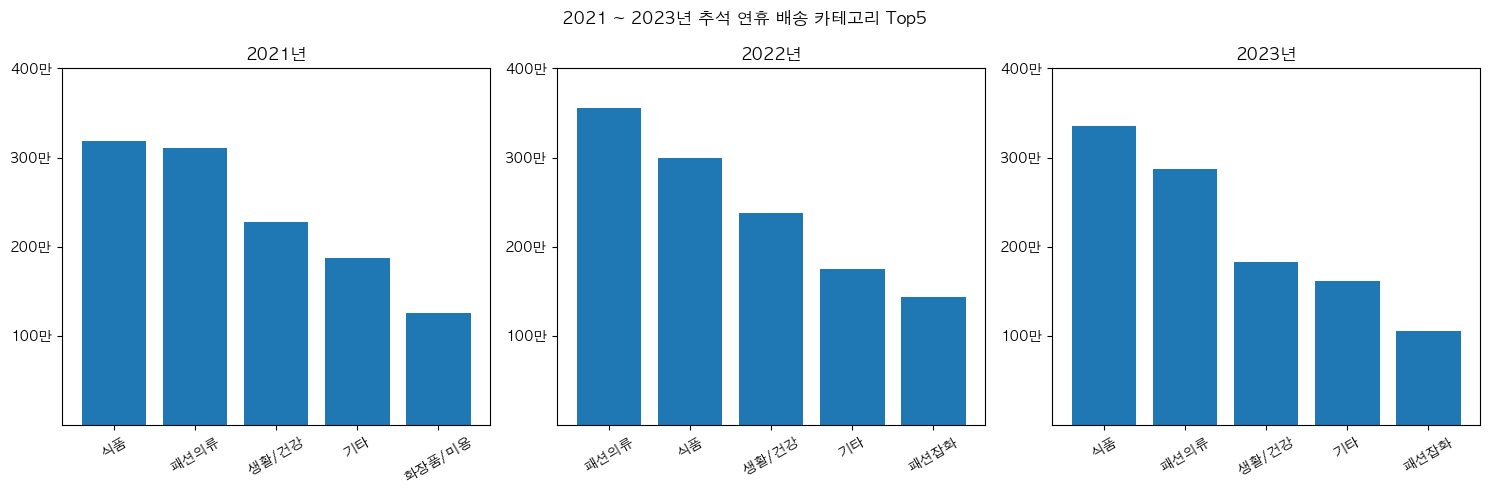

In [ ]:
# 명절 연휴(추석)
# 기간 정하기

# 2021년 추석 연휴 -> 2021-09-15 ~ 2021-09-25  / 평일 8일 주말 3일
# 2022년 추석 연휴 -> 2022-09-06 ~ 2021-09-15  / 평일 8일 주말 2일
# 2023년 추석 연휴 -> 2023-09-20 ~ 2023-09-30  / 평일 8일 주말 3일

# 필요 데이터 추출
cond_2021 = df2['배송년월일'].between('2021-09-15', '2021-09-25')
holi_2021 = df2[cond_2021]

cond_2022 = df2['배송년월일'].between('2022-09-06', '2022-09-15')
holi_2022 = df2[cond_2022]

cond_2023 = df2['배송년월일'].between('2023-09-20', '2023-09-30')
holi_2023 = df2[cond_2023]

# 데이터 전처리
holi_2021.drop(['총량'],axis=1, inplace=True)
stats_2021 = holi_2021.groupby('배송년월일').sum()
stats_1 = stats_2021.sum().sort_values(ascending=False)

holi_2022.drop(['총량'],axis=1, inplace=True)
stats_2022 = holi_2022.groupby('배송년월일').sum()
stats_2 = stats_2022.sum().sort_values(ascending=False)

holi_2023.drop(['총량'],axis=1, inplace=True)
stats_2023 = holi_2023.groupby('배송년월일').sum()
stats_3 = stats_2023.sum().sort_values(ascending=False)

# 시각화
fig = plt.figure(figsize=(15,5))
plt.rc('font', family='AppleGothic')
plt.suptitle('2021 ~ 2023년 추석 연휴 배송 카테고리 Top5')

fig.add_subplot(1,3,1)
plt.title('2021년')
plt.bar(stats_1.index[:5], stats_1.values[:5])
plt.xticks(rotation=30)
plt.yticks([1000000, 2000000, 3000000, 4000000], labels=["100만", "200만", "300만", "400만"])

fig.add_subplot(1,3,2)
plt.title('2022년')
plt.bar(stats_2.index[:5], stats_2.values[:5])
plt.xticks(rotation=30)
plt.yticks([1000000, 2000000, 3000000, 4000000], labels=["100만", "200만", "300만", "400만"])

fig.add_subplot(1,3,3)
plt.title('2023년')
plt.bar(stats_3.index[:5], stats_3.values[:5])
plt.xticks(rotation=30)
plt.yticks([1000000, 2000000, 3000000, 4000000], labels=["100만", "200만", "300만", "400만"])

plt.tight_layout()

## 코리아 세일 페스타

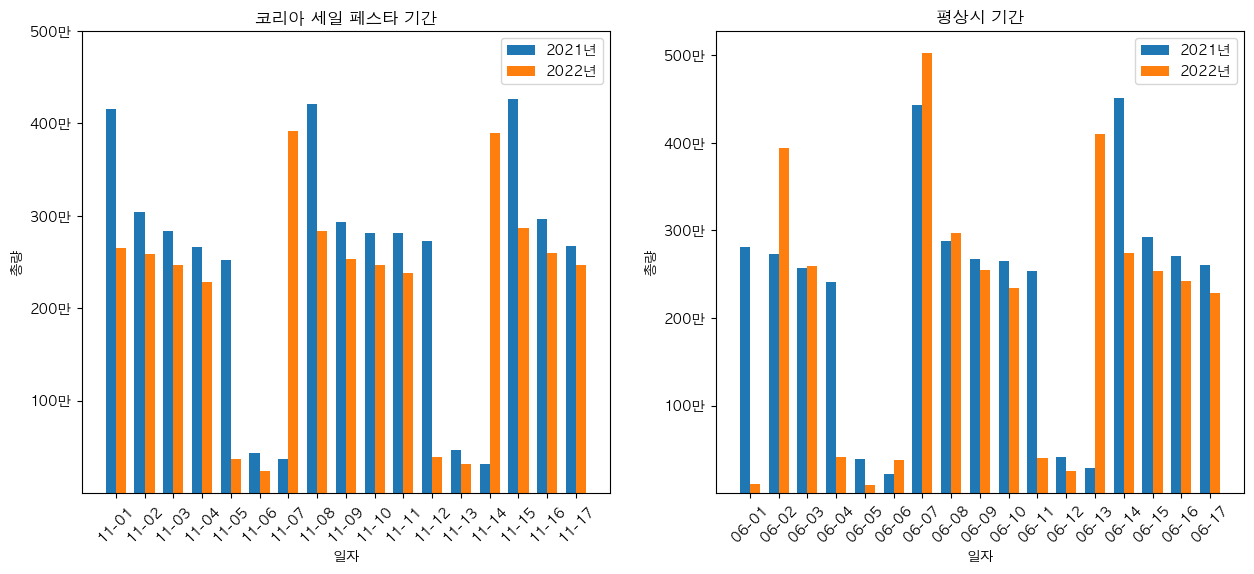

In [ ]:
# 국내 지역 데이터 이므로 코리아 세일 페스타 기간으로 설정

# 기간 설정
# 2021년 --> 2021-11-15 ~ 2021-11-15 (택배 배송 고려해서 17일까지)
# 2022년 --> 2022-11-01 ~ 2022-11-15 (택배 배송 고려해서 17일까지)
# 2023년은 9월 데이터까지 밖에 없는 관계로 제외

# 데이터 전처리

# 페스타 기간
period = df2['배송년월일'].between('2021-11-01', '2021-11-17')
sale_1 = df2[period][['배송년월일','총량']]

period_2 = df2['배송년월일'].between('2022-11-01', '2022-11-17')
sale_2 = df2[period_2][['배송년월일','총량']]

# 페스타 기간 아닌 일반 기간
period_3 = df2['배송년월일'].between('2021-06-01', '2021-06-17')
not_sale = df2[period_3][['배송년월일','총량']]

period_4 = df2['배송년월일'].between('2022-06-01', '2022-06-17')
not_sale_2 = df2[period_4][['배송년월일','총량']]

# 시각화
import numpy as np
fig = plt.figure(figsize=(15, 6))
bar_width = 0.35
index = np.arange(len(sale_1))

fig.add_subplot(1,2,1)
bar1 = plt.bar(index, sale_1['총량'], bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, sale_2['총량'], bar_width, label='2022년')
plt.title('코리아 세일 페스타 기간')
plt.xlabel('일자')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, sale_1['배송년월일'].dt.strftime('%m-%d'), rotation=45)
plt.yticks([1000000, 2000000, 3000000, 4000000, 5000000], labels=["100만", "200만", "300만", "400만", "500만"])
plt.legend()

fig.add_subplot(1,2,2)
bar1 = plt.bar(index, not_sale['총량'], bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, not_sale_2['총량'], bar_width, label='2022년')
plt.title('평상시 기간')
plt.xlabel('일자')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, not_sale['배송년월일'].dt.strftime('%m-%d'), rotation=45)
plt.yticks([1000000, 2000000, 3000000, 4000000, 5000000], labels=["100만", "200만", "300만", "400만", "500만"])
plt.legend()



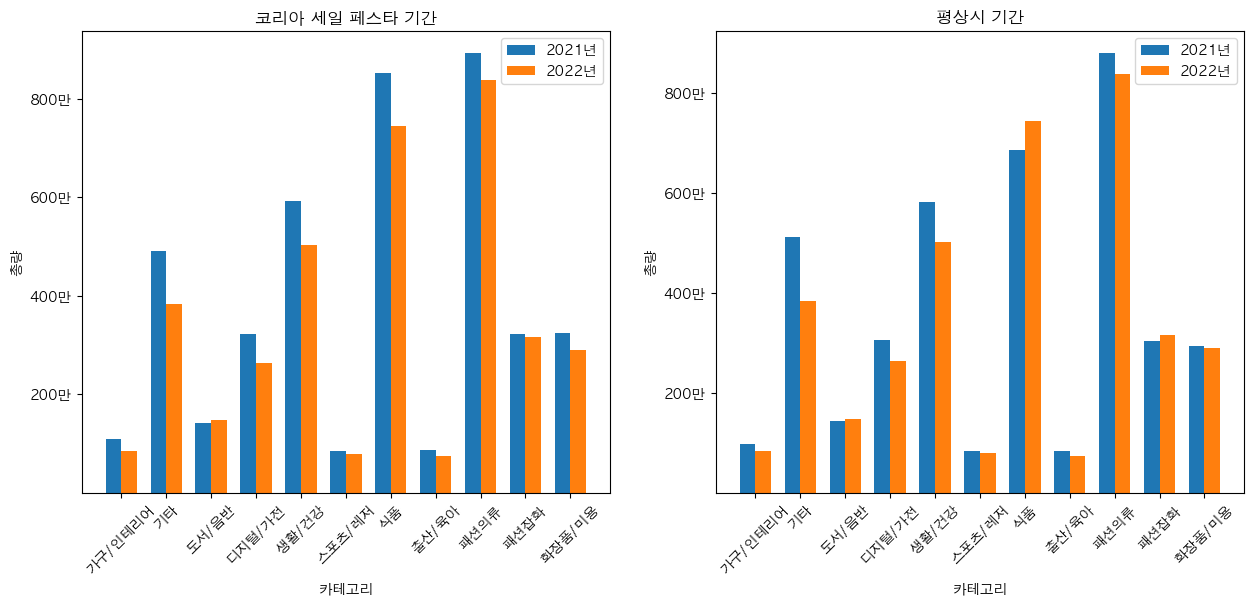

In [ ]:
# 코세페 기간 카테고리 순위

# 라이브러리 호출
import numpy as np

# 데이터 전처리
# 페스타 기간
period = df2['배송년월일'].between('2021-11-01', '2021-11-17')
sale_1 = df2[period].sum(numeric_only=True)

period_2 = df2['배송년월일'].between('2022-11-01', '2022-11-17')
sale_2 = df2[period_2].sum(numeric_only=True)

# 페스타 기간 아닌 일반 기간
period_3 = df2['배송년월일'].between('2021-06-01', '2021-06-17')
not_sale = df2[period_3].sum(numeric_only=True)

period_4 = df2['배송년월일'].between('2022-06-01', '2022-06-17')
not_sale_2 = df2[period_4].sum(numeric_only=True)

sale_1 = sale_1.drop(['총량'])
sale_2 = sale_2.drop(['총량'])
not_sale = not_sale.drop(['총량'])
not_sale_2 = not_sale_2.drop(['총량'])

# 시각화
fig = plt.figure(figsize=(15, 6))
cate = len(sale_1)
bar_width = 0.35
index = np.arange(cate)

fig.add_subplot(1,2,1)
bar1 = plt.bar(index, sale_1.values, bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, sale_2.values, bar_width, label='2022년')
plt.title('코리아 세일 페스타 기간')
plt.xlabel('카테고리')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, sale_1.index,rotation=45)
plt.yticks([2000000, 4000000, 6000000, 8000000], labels=["200만", "400만", "600만", "800만"])
plt.legend()

fig.add_subplot(1,2,2)
plt.bar(index, not_sale.values, bar_width, label='2021년')
plt.bar(index + bar_width, sale_2.values, bar_width, label='2022년')
plt.title('평상시 기간')
plt.xlabel('카테고리')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, sale_1.index,rotation=45)
plt.yticks([2000000, 4000000, 6000000, 8000000], labels=["200만", "400만", "600만", "800만"])

plt.legend()

## 블랙 프라이데이

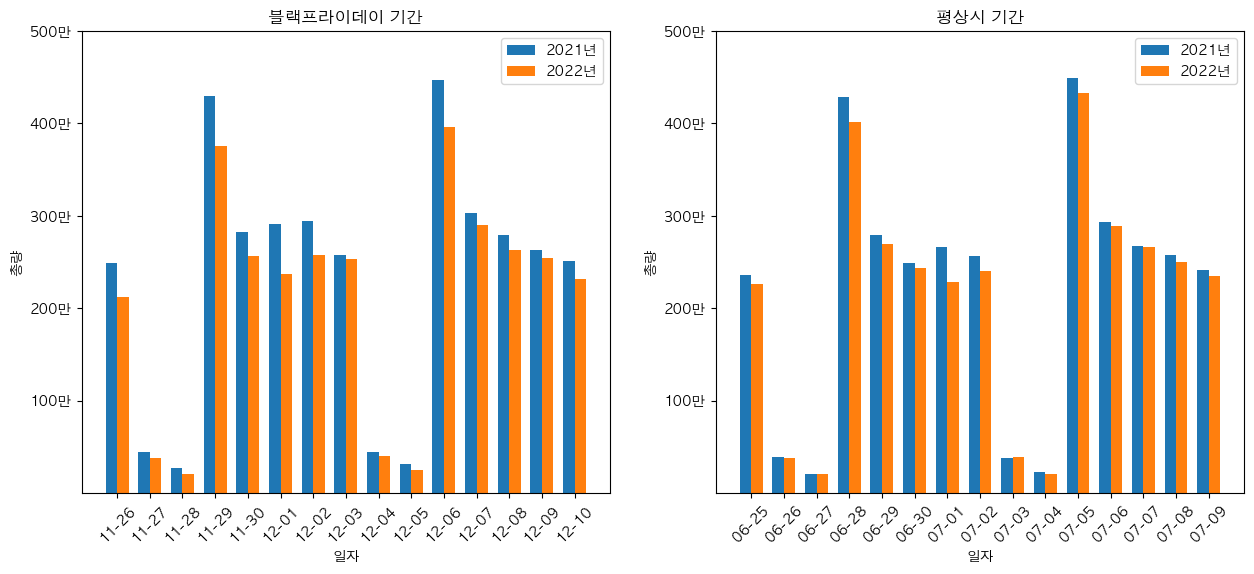

In [ ]:
# 직구 등 블랙프라이데이를 통한 구매도 있을거라 가정

# 기간 설정
# 2021-11-26 --> 2021-11-26 ~ 2021-12-10
# 2022-11-25 --> 2022-11-25 ~ 2022-12-9
# 11월 셋째주 금요일부터 2주기간 설정
# 2023년은 9월 데이터까지 밖에 없는 관계로 제외

# 데이터 전처리

# 블프 기간
period = df2['배송년월일'].between('2021-11-26', '2021-12-10')
sale_1 = df2[period][['배송년월일','총량']]

period_2 = df2['배송년월일'].between('2022-11-25', '2022-12-09')
sale_2 = df2[period_2][['배송년월일','총량']]

# 블프 기간 아닌 일반 기간
period_3 = df2['배송년월일'].between('2021-06-25', '2021-07-09')
not_sale = df2[period_3][['배송년월일','총량']]

period_4 = df2['배송년월일'].between('2022-06-24', '2022-07-08')
not_sale_2 = df2[period_4][['배송년월일','총량']]

# 시각화
import numpy as np
fig = plt.figure(figsize=(15, 6))
bar_width = 0.35
index = np.arange(len(sale_1))

fig.add_subplot(1,2,1)
bar1 = plt.bar(index, sale_1['총량'], bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, sale_2['총량'], bar_width, label='2022년')
plt.title('블랙프라이데이 기간')
plt.xlabel('일자')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, sale_1['배송년월일'].dt.strftime('%m-%d'), rotation=45)
plt.yticks([1000000, 2000000, 3000000, 4000000, 5000000], labels=["100만", "200만", "300만", "400만", "500만"])
plt.legend()

fig.add_subplot(1,2,2)
bar1 = plt.bar(index, not_sale['총량'], bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, not_sale_2['총량'], bar_width, label='2022년')
plt.title('평상시 기간')
plt.xlabel('일자')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, not_sale['배송년월일'].dt.strftime('%m-%d'), rotation=45)
plt.yticks([1000000, 2000000, 3000000, 4000000, 5000000], labels=["100만", "200만", "300만", "400만", "500만"])
plt.legend()



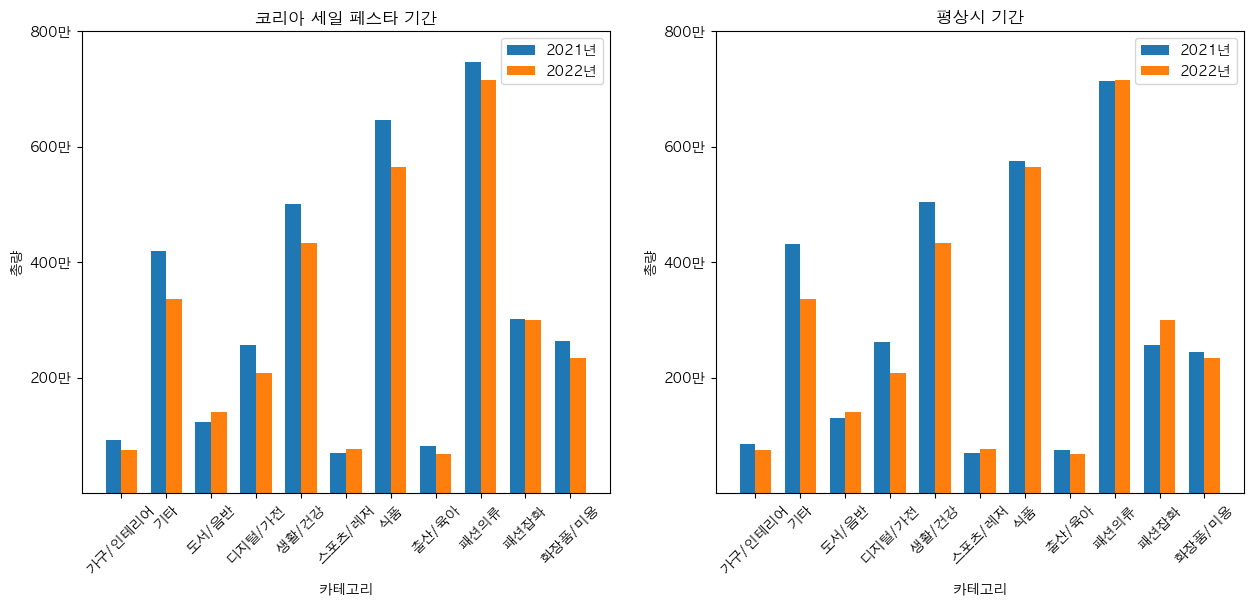

In [ ]:
# 코세페 기간 카테고리 순위

# 라이브러리 호출
import numpy as np

# 데이터 전처리
# 블프 기간
period = df2['배송년월일'].between('2021-11-26', '2021-12-10')
sale_1 = df2[period].sum(numeric_only=True)

period_2 = df2['배송년월일'].between('2022-11-25', '2022-12-09')
sale_2 = df2[period_2].sum(numeric_only=True)

# 페스타 기간 아닌 일반 기간
period_3 = df2['배송년월일'].between('2021-06-25', '2021-07-09')
not_sale = df2[period_3].sum(numeric_only=True)

period_4 = df2['배송년월일'].between('2022-06-24', '2022-07-08')
not_sale_2 = df2[period_4].sum(numeric_only=True)

sale_1 = sale_1.drop(['총량'])
sale_2 = sale_2.drop(['총량'])
not_sale = not_sale.drop(['총량'])
not_sale_2 = not_sale_2.drop(['총량'])

# 시각화
fig = plt.figure(figsize=(15, 6))
cate = len(sale_1)
bar_width = 0.35
index = np.arange(cate)

fig.add_subplot(1,2,1)
bar1 = plt.bar(index, sale_1.values, bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, sale_2.values, bar_width, label='2022년')
plt.title('코리아 세일 페스타 기간')
plt.xlabel('카테고리')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, sale_1.index,rotation=45)
plt.yticks([2000000, 4000000, 6000000, 8000000], labels=["200만", "400만", "600만", "800만"])
plt.legend()

fig.add_subplot(1,2,2)
plt.bar(index, not_sale.values, bar_width, label='2021년')
plt.bar(index + bar_width, sale_2.values, bar_width, label='2022년')
plt.title('평상시 기간')
plt.xlabel('카테고리')
plt.ylabel('총량')
plt.xticks(index + bar_width / 2, sale_1.index,rotation=45)
plt.yticks([2000000, 4000000, 6000000, 8000000], labels=["200만", "400만", "600만", "800만"])

plt.legend()

# 기계학습

In [ ]:
from prophet import Prophet

14:07:25 - cmdstanpy - INFO - Chain [1] start processing


14:07:25 - cmdstanpy - INFO - Chain [1] done processing
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/prophet/plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/prophet/plot.py:196: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


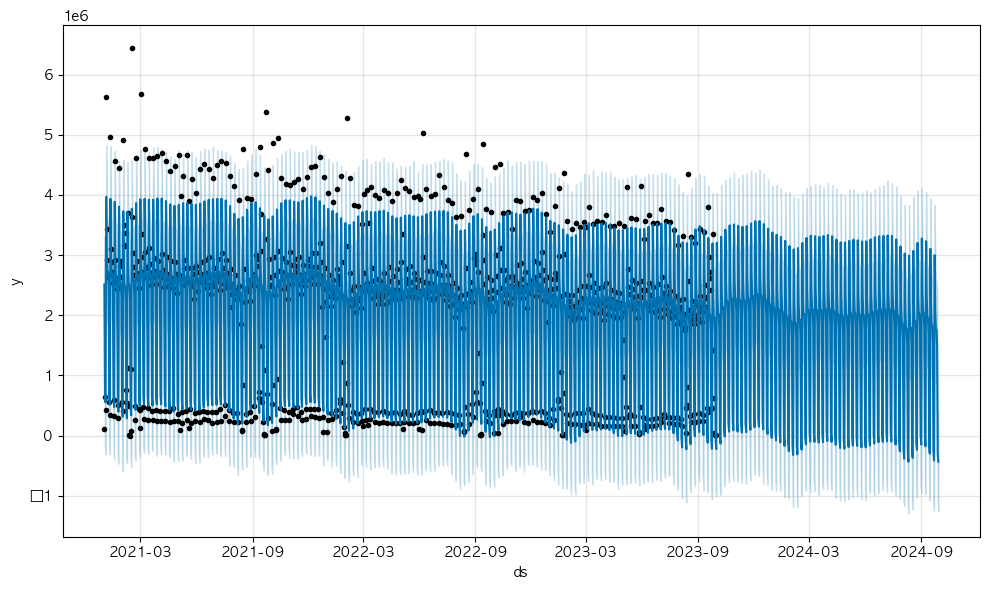

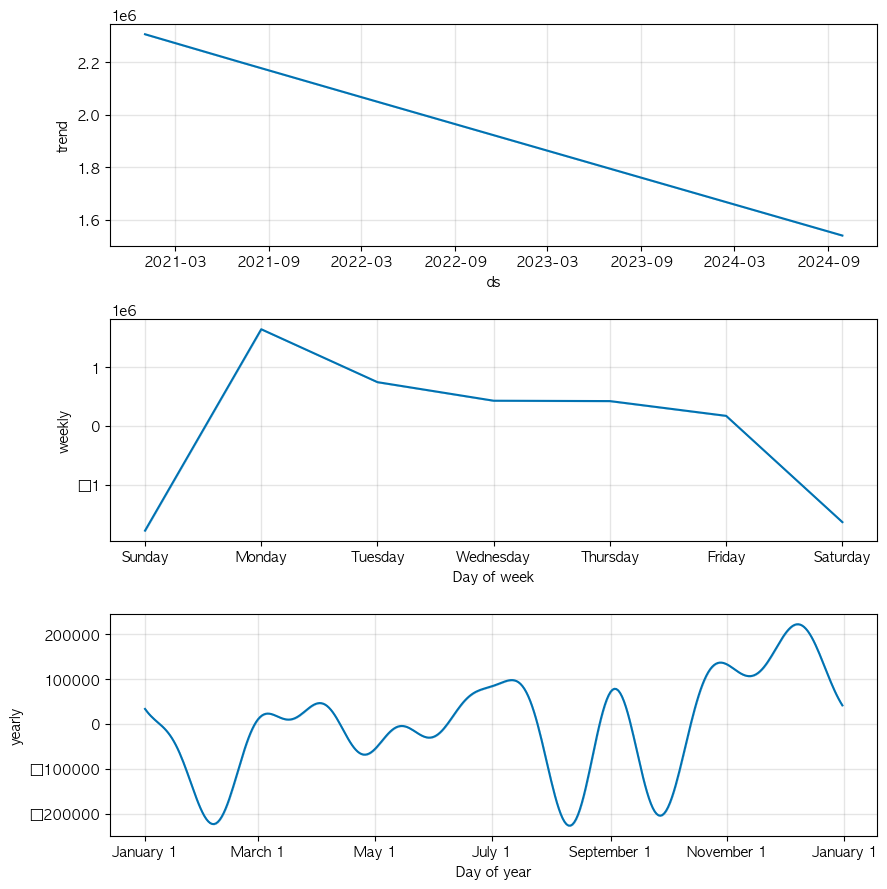

In [ ]:
mcdf = pd.DataFrame()
mcdf = df2[["배송년월일", "총량"]]
mcdf.columns = ["ds", "y"]

m = Prophet()
m.fit(mcdf)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

14:07:26 - cmdstanpy - INFO - Chain [1] start processing
14:07:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/prophet/plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/prophet/plot.py:196: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


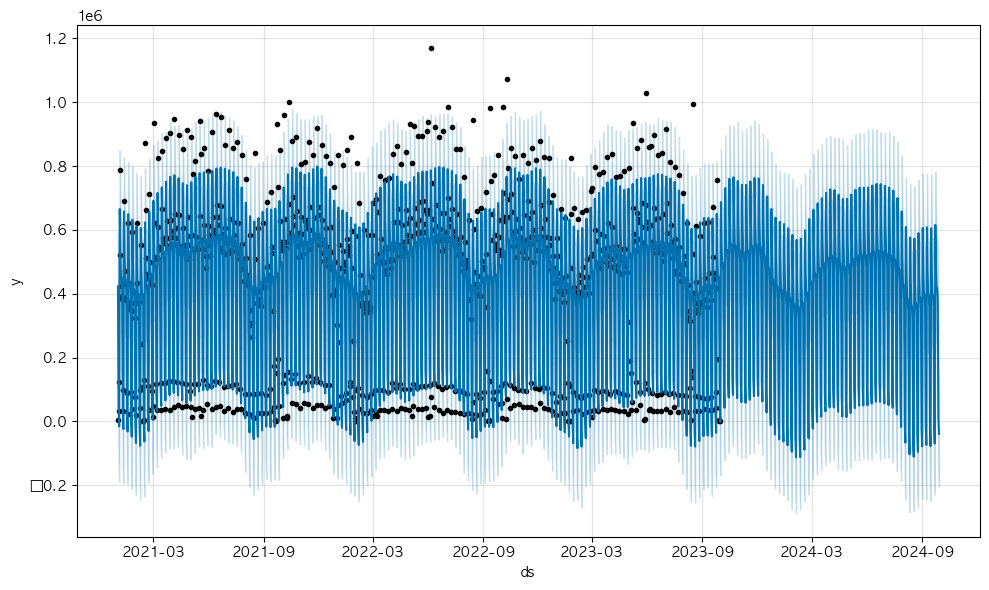

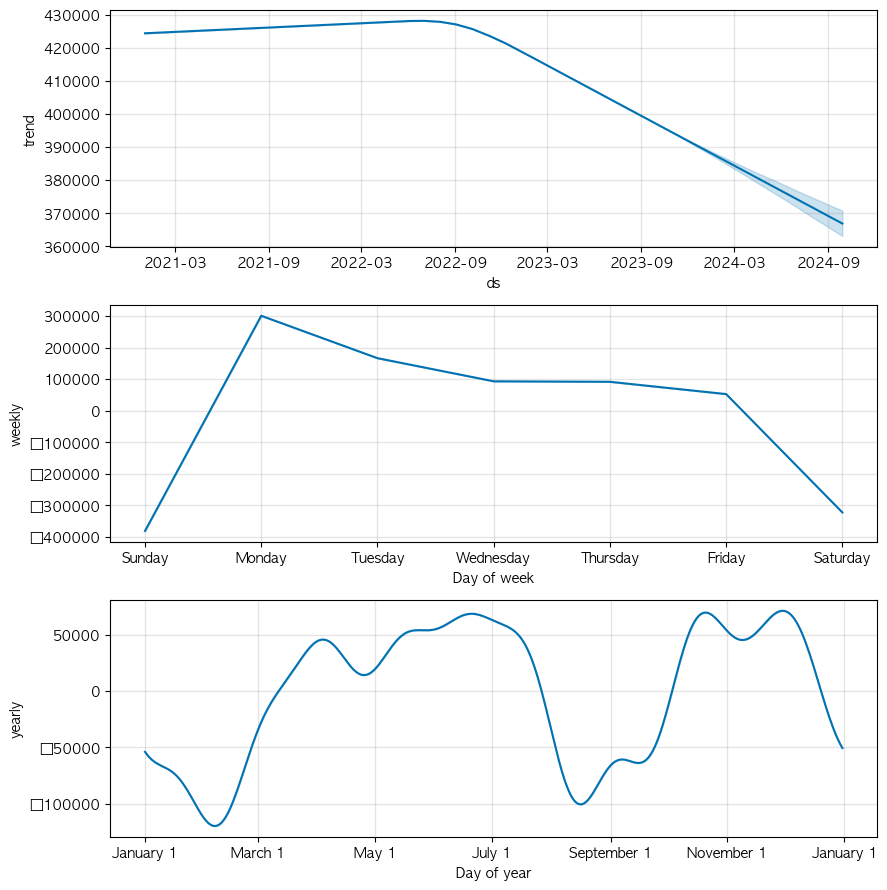

In [ ]:
mcdf = pd.DataFrame()
mcdf = df2[["배송년월일", "패션의류"]]
mcdf.columns = ["ds", "y"]

m = Prophet()
m.fit(mcdf)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

14:07:26 - cmdstanpy - INFO - Chain [1] start processing
14:07:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/prophet/plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/prophet/plot.py:196: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/song-youngjae/mambaforge/envs/test_venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


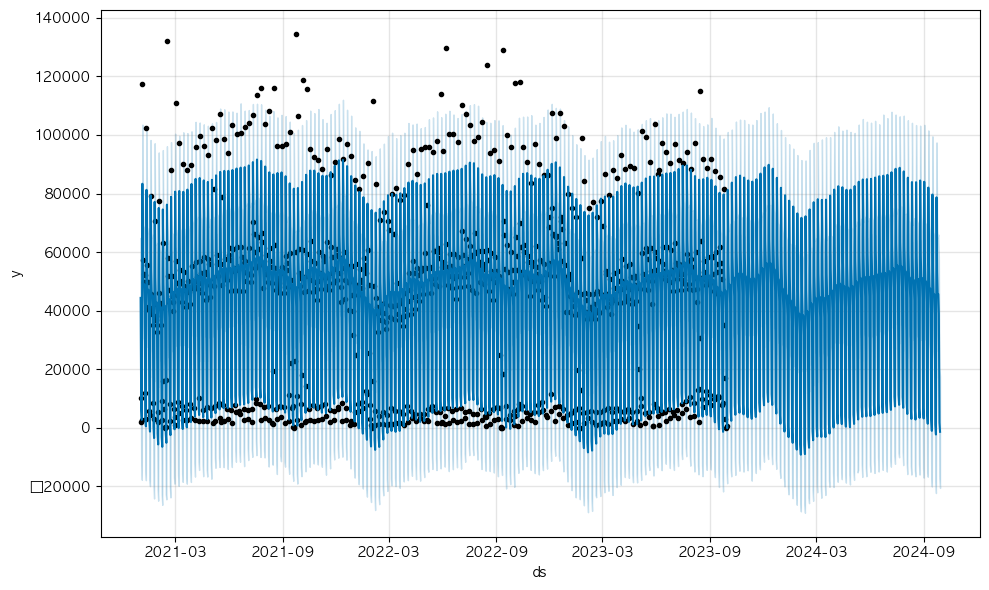

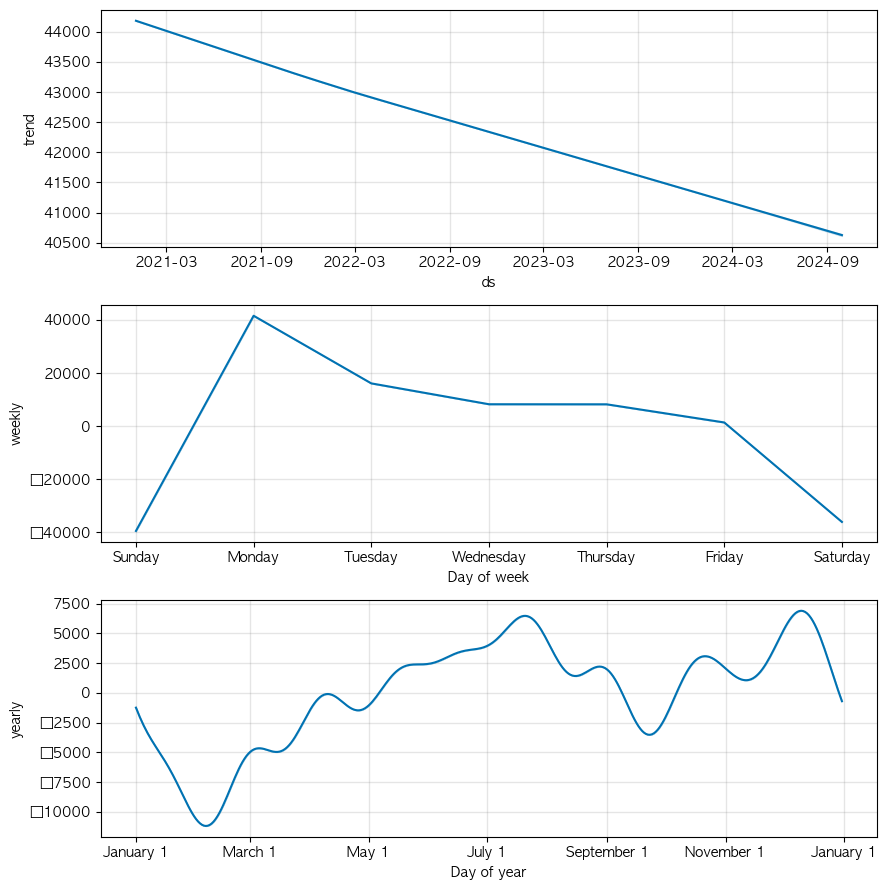

In [ ]:
mcdf = pd.DataFrame()
mcdf = df2[["배송년월일", "스포츠/레저"]]
mcdf.columns = ["ds", "y"]

m = Prophet()
m.fit(mcdf)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)